Import statements

In [39]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

In [40]:
import pandas as pd

In [41]:
from geopy.geocoders import Nominatim

In [72]:
import numpy as np

In [93]:
from IPython import display
from base64 import b64decode


In [42]:

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Get the HTML from the URL

In [43]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
html_data  = requests.get(url).text 

In [44]:
soup = BeautifulSoup(html_data,"html5lib")

Create a dataframe with the data from the Wikipedia page. Parse the table and extract the postal codes, borough, and neighborhood

In [45]:
toronto_data = pd.DataFrame(columns=["PostalCode", "Borough", "Neighborhood"])
toronto_data

,PostalCode,Borough,Neighborhood


In [46]:
toronto_data = pd.DataFrame(columns=["PostalCode", "Borough", "Neighborhood"])


for row in soup.find("tbody").find_all("tr"):
    for col in row.find_all("td"):
        if "Not assigned" in col.text:
            continue
      #  print(col.text)
        postalcode = col.text[0:4]
        postalcode = postalcode.strip()
       # print("postal code", postalcode)
        restofstring = col.text[4:]
        #print ("rest of string", restofstring)
        parts = restofstring.split("(")
       # print("parts o is ", parts[0])
        borough = parts[0]
      #  print("parts 1 is ", parts[1])
        neighborhood = parts[1].replace(')', '')
        neighborhood = neighborhood.replace('/', ',')
        neighborhood = neighborhood.strip()
       # print("neighborhood ", neighborhood)
        toronto_data = toronto_data.append({"PostalCode":postalcode, "Borough":borough, "Neighborhood":neighborhood}, ignore_index=True)



In [47]:
toronto_data.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [48]:
toronto_data.shape

(103, 3)

Read CSV file into dataframe

In [49]:
# The code was removed by Watson Studio for sharing.

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Set indexes to both dataframes to 'Postal Code' for join and then join dataframes

In [50]:
toronto_data.set_index('PostalCode', inplace=True)

In [51]:
postalcodeslatlon.set_index("Postal Code", inplace=True)

In [52]:
toronto_data_latlon = toronto_data.join(postalcodeslatlon)
toronto_data_latlon

,Borough,Neighborhood,Latitude,Longitude
PostalCode,,,,
M3A,North York,Parkwoods,43.753259,-79.329656
M4A,North York,Victoria Village,43.725882,-79.315572
M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494
...,...,...,...,...
M8X,Etobicoke,"The Kingsway , Montgomery Road , Old Mill North",43.653654,-79.506944
M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
M7Y,East TorontoBusiness reply mail Processing Cen...,Enclave of M4L,43.662744,-79.321558


Get Boroughs with Toronto in the name

In [53]:
toronto_data_latlon.reset_index(inplace = True)

In [54]:
toronto_data_latlon['Borough']

0                                             North York
1                                             North York
2                                       Downtown Toronto
3                                             North York
4                                           Queen's Park
                             ...                        
98                                             Etobicoke
99                                      Downtown Toronto
100    East TorontoBusiness reply mail Processing Cen...
101                                            Etobicoke
102                                            Etobicoke
Name: Borough, Length: 103, dtype: object

In [55]:

torontob_data = toronto_data_latlon[['Toronto' in borough for borough in toronto_data_latlon['Borough']]]
torontob_data.reset_index(drop=True)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
1,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
2,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
3,M4E,East Toronto,The Beaches,43.676357,-79.293031
4,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
5,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
6,M6G,Downtown Toronto,Christie,43.669542,-79.422564
7,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.650571,-79.384568
8,M6H,West Toronto,"Dufferin , Dovercourt Village",43.669005,-79.442259
9,M4J,East YorkEast Toronto,The Danforth East,43.685347,-79.338106


Map our results

In [56]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="t_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [57]:
# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(torontob_data['Latitude'], torontob_data['Longitude'], torontob_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Utilize the Foursquare API to explore the neighborhoods and segment them

In [92]:
# The code was removed by Watson Studio for sharing.

In [59]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [60]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Get top 100 venues for each neighborhood

In [61]:
toronto_venues = getNearbyVenues(names=torontob_data['Neighborhood'],
                                   latitudes=torontob_data['Latitude'],
                                   longitudes=torontob_data['Longitude']
                                  )

Regent Park , Harbourfront
Garden District, Ryerson
St. James Town
The Beaches
Berczy Park
Central Bay Street
Christie
Richmond , Adelaide , King
Dufferin , Dovercourt Village
The Danforth  East
Harbourfront East , Union Station , Toronto Islands
Little Portugal , Trinity
The Danforth West , Riverdale
Toronto Dominion Centre , Design Exchange
Brockton , Parkdale Village , Exhibition Place
India Bazaar , The Beaches West
Commerce Court , Victoria Hotel
Studio District
Lawrence Park
Roselawn
Davisville North
Forest Hill North & West
High Park , The Junction South
North Toronto West
The Annex , North Midtown , Yorkville
Parkdale , Roncesvalles
Davisville
University of Toronto , Harbord
Runnymede , Swansea
Moore Park , Summerhill East
Kensington Market , Chinatown , Grange Park
Summerhill West , Rathnelly , South Hill , Forest Hill SE , Deer Park
CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport
Rosedale
Enclave of M5E
St. Jame

In [62]:
print(toronto_venues.shape)
toronto_venues.head()

(1586, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Regent Park , Harbourfront",43.65426,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
1,"Regent Park , Harbourfront",43.65426,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery
2,"Regent Park , Harbourfront",43.65426,-79.360636,Cooper Koo Family YMCA,43.653249,-79.358008,Distribution Center
3,"Regent Park , Harbourfront",43.65426,-79.360636,Impact Kitchen,43.656369,-79.356980,Restaurant
4,"Regent Park , Harbourfront",43.65426,-79.360636,Body Blitz Spa East,43.654735,-79.359874,Spa


Check how many venues were returned for each neighborhood

In [63]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton , Parkdale Village , Exhibition Place",23,23,23,23,23,23
"CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport",14,14,14,14,14,14
Central Bay Street,65,65,65,65,65,65
Christie,15,15,15,15,15,15
Church and Wellesley,73,73,73,73,73,73
"Commerce Court , Victoria Hotel",100,100,100,100,100,100
Davisville,36,36,36,36,36,36
Davisville North,8,8,8,8,8,8


Find out how many unique categories can be curated from all the returned venues


In [64]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 235 uniques categories.


Analyze each neighborhood

In [65]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

toronto_onehot.columns.get_loc("Neighborhood")
cols = list(toronto_onehot)
# move the column to head of list using index, pop and insert
cols.insert(0, cols.pop(cols.index('Neighborhood')))
toronto_onehot = toronto_onehot.loc[:, cols]
toronto_onehot


,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,Enclave of M4L,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1582,Enclave of M4L,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1583,Enclave of M4L,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1584,Enclave of M4L,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
toronto_onehot.shape

(1586, 235)

In [67]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brockton , Parkdale Village , Exhibition Place",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478
2,"CN Tower , King and Spadina , Railway Lands , ...",0.071429,0.071429,0.071429,0.071429,0.142857,0.142857,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.015385,0.000000,0.000000,0.015385,0.000000,0.015385
4,Christie,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Church and Wellesley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.027397
6,"Commerce Court , Victoria Hotel",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000
7,Davisville,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.00,...,0.000000,0.027778,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Davisville North,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Dufferin , Dovercourt Village",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [68]:
toronto_grouped.shape

(39, 235)

Print each neighborhood along with the top 5 most common venues

In [69]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1        Cocktail Bar  0.05
2              Bakery  0.05
3  Seafood Restaurant  0.03
4            Pharmacy  0.03


----Brockton , Parkdale Village , Exhibition Place----
                venue  freq
0                Café  0.13
1      Breakfast Spot  0.09
2         Coffee Shop  0.09
3         Yoga Studio  0.04
4  Italian Restaurant  0.04


----CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport----
                 venue  freq
0      Airport Service  0.14
1     Airport Terminal  0.14
2              Airport  0.07
3      Harbor / Marina  0.07
4  Rental Car Location  0.07


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.17
1      Sandwich Place  0.05
2  Italian Restaurant  0.05
3                Café  0.05
4     Bubble Tea Shop  0.03


----Christie----
                venue  freq
0       Grocery Store  0.27
1                C

Function to sort the venues in descending order.


In [70]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Create new dataframe and display the top 10 venues for each neighborhood.

In [82]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Pharmacy,Farmers Market,Beer Bar,Cheese Shop,Restaurant,Irish Pub
1,"Brockton , Parkdale Village , Exhibition Place",Café,Breakfast Spot,Coffee Shop,Yoga Studio,Italian Restaurant,Stadium,Nightclub,Furniture / Home Store,Climbing Gym,Bakery
2,"CN Tower , King and Spadina , Railway Lands , ...",Airport Service,Airport Terminal,Airport,Harbor / Marina,Rental Car Location,Coffee Shop,Sculpture Garden,Boat or Ferry,Plane,Airport Food Court
3,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Bubble Tea Shop,Department Store,Thai Restaurant,Salad Place,Burger Joint,Japanese Restaurant
4,Christie,Grocery Store,Café,Park,Baby Store,Italian Restaurant,Restaurant,Coffee Shop,Candy Store,Nightclub,Noodle House


Run _k_-means to cluster the neighborhood into 5 clusters.

In [83]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [84]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 0, 1, 2,
       1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int32)

Create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [85]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = torontob_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636,1,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Chocolate Shop,Mexican Restaurant,Distribution Center
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Clothing Store,Coffee Shop,Japanese Restaurant,Cosmetics Shop,Café,Middle Eastern Restaurant,Bubble Tea Shop,Italian Restaurant,Thai Restaurant,Lingerie Store
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Café,Coffee Shop,Cocktail Bar,Gastropub,Cosmetics Shop,Farmers Market,Restaurant,Moroccan Restaurant,Seafood Restaurant,Lingerie Store
19,M4E,East Toronto,The Beaches,43.676357,-79.293031,1,Health Food Store,Pub,Trail,New American Restaurant,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306,1,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Pharmacy,Farmers Market,Beer Bar,Cheese Shop,Restaurant,Irish Pub


Let's visualize the resulting clusters

In [86]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

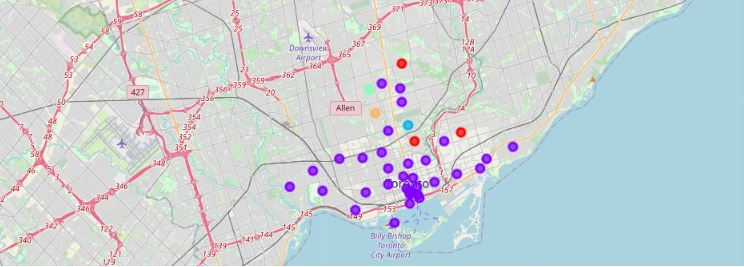

In [94]:
base64_data = "/9j/4AAQSkZJRgABAQEAYABgAAD/4RDSRXhpZgAATU0AKgAAAAgABAE7AAIAAAAER01XAIdpAAQAAAABAAAISpydAAEAAAAIAAAQwuocAAcAAAgMAAAAPgAAAAAc6gAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFkAMAAgAAABQAABCYkAQAAgAAABQAABCskpEAAgAAAAM2NAAAkpIAAgAAAAM2NAAA6hwABwAACAwAAAiMAAAAABzqAAAACAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMjAyMTowMzoyNyAxNzoxMjozOAAyMDIxOjAzOjI3IDE3OjEyOjM4AAAARwBNAFcAAAD/4QsWaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49J++7vycgaWQ9J1c1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCc/Pg0KPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyI+PHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj48cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0idXVpZDpmYWY1YmRkNS1iYTNkLTExZGEtYWQzMS1kMzNkNzUxODJmMWIiIHhtbG5zOmRjPSJodHRwOi8vcHVybC5vcmcvZGMvZWxlbWVudHMvMS4xLyIvPjxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSJ1dWlkOmZhZjViZGQ1LWJhM2QtMTFkYS1hZDMxLWQzM2Q3NTE4MmYxYiIgeG1sbnM6eG1wPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvIj48eG1wOkNyZWF0ZURhdGU+MjAyMS0wMy0yN1QxNzoxMjozOC42NDE8L3htcDpDcmVhdGVEYXRlPjwvcmRmOkRlc2NyaXB0aW9uPjxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSJ1dWlkOmZhZjViZGQ1LWJhM2QtMTFkYS1hZDMxLWQzM2Q3NTE4MmYxYiIgeG1sbnM6ZGM9Imh0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvIj48ZGM6Y3JlYXRvcj48cmRmOlNlcSB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPjxyZGY6bGk+R01XPC9yZGY6bGk+PC9yZGY6U2VxPg0KCQkJPC9kYzpjcmVhdG9yPjwvcmRmOkRlc2NyaXB0aW9uPjwvcmRmOlJERj48L3g6eG1wbWV0YT4NCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgPD94cGFja2V0IGVuZD0ndyc/Pv/bAEMABwUFBgUEBwYFBggHBwgKEQsKCQkKFQ8QDBEYFRoZGBUYFxseJyEbHSUdFxgiLiIlKCkrLCsaIC8zLyoyJyorKv/bAEMBBwgICgkKFAsLFCocGBwqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKioqKv/AABEIAQsC6AMBIgACEQEDEQH/xAAfAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgv/xAC1EAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGRoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T19vf4+fr/xAAfAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgv/xAC1EQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/APapHZ0yzfK3G0HtUYupItsRw5b7jMOn1/zzTc7flA3N2Ht6/SpPLVYz5h3tJ17UrInlVrDURYl+VcgnJy3U+tRyeYz5RCAG46H/AD+NOBIYRt1P3W9fb6084HC0nG6sxtXQlxKJY13oTIvUtgcfh1pjQosIeOZefvJ0IpzHdmPt/EfQen1pypH0ZRjopPb2P+NZyp32JcblcOFcL1Ht2pZGwyDsTyPWp5LMsoK9hk4HSqu0RMXflRzuJ6VlGPLLUzkpLQtRHPyE4HX0zUE+q2tspRFNzIDy8Y+Ufif6ZqkzyallEJjts/i/19varUMCRR4TDD3FDqv5lczexP8A2iHsyzTRiMdSBn/P5UkQDN5jPJLG+CUDFQfcAYrOlslabemcYyUHTNJY3sdtC0VwWVlYkAgnj0FXGqm7PQSqa2Ztp5NtqkZiVfJuExkDhWHf8elX0uYpJDHG4ZgMkCuTuby4KyTJFmEdEZec/wB761t2F3afYop7Yb/NXO7+Yz9aa5ZbGqnzbFbWU/4qTS3x1WZf/HDVpbWd1+VMe7cVl6pctBd6ZczPlYrrDMewYYP6V0F65+ynypI1Ld3bAIqm3DRHVVTlSpyt0a/F/wCZUaHymj3shLEq2D0zyP5U9toXkcVkNdwQGWK0nW7vQuVgiGQSD/eOB+tQvrk93cWsVnFFJ58e5ZSpVSdjPjk8NhQdvPc9q53Bud29Cfq1WcU2rW7/AJm9bbZJnAJXKDn+f9KoapqenQr9ni3XVz/DFByfxPQVWm064+y7tX1CPDYHlQHYMHsD1Pb8qpxeYwMGl2bW1v0Mu0Kz++W/nyfatuV7Ifs6EPi95+W33/8AA+Yxkubx1guGfcTn7HaNyR/tv0A/T8a1otGjtbRjMIYxj5YU4jB9STy59z+Qptvay2UBW0KxJkk7TlmPuSOT71O0nlqPMAckDaWXcT78n3o5ZLY5q1arKPLe0ey2/r7xFuYZLGSF4vPblQqgbcjvk8CqiWTsokVUs2U9IGPB9x90/kasKpeUueR2Ld/epcHdzjB4P17f5+lbEwb5TNZfsswk1HzJh2nJJUexQcD64x9K0Y5IzGGQqUI4KnjHtS4B4bnPrVN9PMUhlsZPIY8smMo/uR6+45+tM0LoLYA4ApMHcR2IFU4r/Y4ivU+zyE/KS2Uf/db+h59qubsSAZwSp4/Ef/XoEKDnGegP5HvWdo7ubOSGVizRTyREk56HIq+0kUEMksz7I4wXZiM4HUmsq0muI7mKUygx3U24oBF5jhiACQEKnaAxbbtxzy2OYbSZ10ouVKS9PwNo7Gj+ViCoOc+vt+NMiwFxINxUkDPseOPpihhGoOTk9gOlBZY5GKhexwTz0/8ArUJ32OIlVGjILoME5CntRONy7n+UgD5fpUTuZUx8xB/i6Af5/GnEboxmRTj5Tjk/mai0ubUi1pXZJhUywXIH8R4FQpL/AK1FUt8xYN0Azz9epNIOgLZJx1Y5/n0pV/1hP+z0/P8Axq1FdTRLuVr/AHC0Z88xssnA/usD3+lWAqj5sZPqTk/rTbpN9rKo7ocflS25823jK87kB/SrGK7FlKbc/KegqSNQqDb09/ekUYfB+lJDholyMnHGTmlbqFh+/rgH2xzTJlaVQSMepxyMVMHxGUwMGguSuOAPYdalq6Jkm1YiWJv3LH5vMyvHGDjOP0ps6vboGdDgnFOk4iKr0yGGOMGphdq9uI7qM7iuOcYY00pWFeyszNNw7HAGKb5csh5yfcmp1KDiNQPfqakGccDAH94/0qUr7kqLlux8K7bVwxJaPa4544PP6VNMAruAY8FiecZ55quATkbiMjGBxmpVMX2eLYoB2jJA6nvU2tU9V+X/AA50WTppdiNFZpAFTcD3Y7QP6/pUD39rEreZcBAjbWIhfIPHX5TgcjnGDmo21l5NQWy0yMXEgP72XgrEPr602DRYo5A8km8+a0roFwrHAwOp4BG7HrjoBirbfQ3VGMFetpfZdf8AgFS81c2V88NpALs7yj4JLqwA4/XpUkUviC++4lrpy46y/Mx/Dn9QKvxWyQXksqnJmy2MYAGEUAfgo/WrBHUfjTs3uW69KCShBX7vX8NjKm0/UHiW3uLt7ovIpeV1RUiQEbhj7wyP7o6gdKS50yZNPucR77i4yGOUIjQdC27knGclQSCxA4xW0GBjGRk/Wl3bZAwOSPWp5TP61UvsvuOehsIp/s9yu7y1aSRQF5beHXk91+YHHqop72EPlwp5ZCxSLIWIyzMDkndnjcc7uOdxqzbD7LO9sT8m5mj+m45H65+hq4SGjKnp6+lPlRnPEV3qpGe2g2NzHteFtkfC4kPyjaKx9S0R7C6s5I28y3aVUAfkpk5wfUda6fOJGQkEls8d/lFU9WXzNMmVCDKu141zySrA8fgDQ4nTg8ZWVRRcrp6a+ZZNtB9oSXyI98WQnGAvXkDpnk84zyadJbW0hhXyVKRAbEI+VcYx8vQ4wMZ6UWs32yFp412RZIJbnkdacIixzvbAPG7ofqv+TT0OOU5qWrd0RpaW9rM/2VVUMMnbnGc8/wA6sK+7Cv0HQ1C7BP8AWfIyHJBP+expS3ICgtk9egp20JleXxO4rjGcduR/OqQ23WqFyR5VpwCenmEc/kp/8eqa9uGt7VpCRuxtQAcsx4A/MiksbVLWxijCAPg73PJZ/wCI8++aFsBMHw7BFLZAzjp+f4ChlZlZcgZGOB/jTlO113fMD8pz+f8ASpTl4wIzkA5245ovYTdjMvmaCS0nViyCULJvOcqwwDz0wSOlXQctz3HOPUHB/nVa/ga4064hUYfB2fXqv9KdaXC3VlDcrwHVZMemRgj/AD6UxmhOgNuFjGUz97OarKxZATwSORgcHvUsU7Qkkcg9iDUkAWfzRsC856ev/wBfNS3yozk+RXZVOd6nseDx+I/rU8duxbLn5R3OKJ4lhHzB8YzuI4JHbP4Us0pf5UG1B0A70tWlYXM5fCNaQlBEnReOO/vUZGME8FW5+h4P9KA6JuLNhwMqB1NNO585XqDy5xz/AD/lUzjeDSNqfuyJ/MQQ7BGu49W61GCY2yDjBzk+9NU7vmLYDDPyDGD+NAVVYlRyR1PJ/M1cWpK66icbNpkjfvsGJC0mc4Xp+Z4oRP8AWKSqdGOBk59M/riiEMz7k/gOSc4xUlwd8ssoP7vIBI6HA/yKLpJmTV5KKK7BVZgCXJPyl+cDucdBQSPLwnCgcD6c0/aRh5AcPwQP4R2H+e5ptxLbwkMHWNMD7xxz+NZU7yfOzok7e4v6YgUKxK5+bmnKMuM49eaoHU4dpW3WW6YHAEKEgg9PmOF6ep7U9G1GYriKG2DdN7eYw/Acfqa0aVrIydrWLUu5pdzKCT3HSopLq3hJEkyhx0jHLH6KOTTotGa6jZ9Qu7lhnhFbyl/8d5/WnxfZtO+WJbeLjlYk5P1NRFt7LUxdVRGwSXswY29qLdXP+sujjP0Qc/nj6Vn3UKR3JeST7RKvG7AVV9lHb69T61pXWrxGErHkM397jHvWOgd5C8mQvRVz+prrowlvJGE6zlGwsQc5eX7x6L/dHpUlFFdRzvUKKKKBBRRRQAp60UHrRQBprgJwSWJyxI7+lPmYEggAMRyBUYDoiO2CxHT1oBzz6/p7VwHrxs1cMAqVPIPWmmQqyxnl2+62OPx/L8acTjAAyx6D+p9qNq+WVbJZj8zev+FAxVUKuB09fU+tL09waYpO4Ixyex/vf/XqXOF45XuKAHRyNFjo6kYKk849M1ialMHl2Ikv2XOd2Pv/AP1hWqw3ZUH5B1I7+3+NPK+b/q1AIXlf73/16xlBz3JlHmVjPtJI2UrFjaR2FWUZeFU9vSqktiY2aa0bGeSnrT4buJwGY7cDBB7Gs5R6Pc51eGjLGApLDvUdwqNt3KC2cg4pyu0gzGQF7H1qJrhDIUbG4Dv0/Os3BlOSsSMVcKM8HtiqFjexWUN1Hct5aQNvGepB7AfUH86sXM8drbNMfvBlUKWwASwGSewAJJPoKypbaK71OWEqJ5IUWVs+nynpwSDu49dpGO9XTTjLU6sPSc2py+HqWLy7+3faY5LdXjiEUkSMQNoygctlh8wzJhTwcDms2HSft8XnzyfZIyqHYcswJUEgLk46++Dx2re1mz36dI9ndOsqqXXa+wNx93Ax/wDrpmjzxW/h63lnkUPtZmxyT859OvWt7a6nrRxMqVDnpaa29P6sM0/SraAMywSTll2E3ACow6/cwcjIHUVL5Z81mtlt3nVQiiJFUxgfwlzlsAdh+VO2XV+v77faQN/yzBxIw9yPu/hz9KlhKwfuYo1jVDlFUY5/+vU1PdV10PPliJzl+8e4y10lI5PtU2Jpx/ERwn0B/meauoSjEDGAOM+npSjJU4bhhkY70zHzKRxt4PuD7/ka0Tuc+t7MmcINpTkbeR6GocYUHr5Z6nn5T/h/SnkFSVP40mSrDjIbj8e39aZEo80bCxkrkSRkt0GO/vRJFIsWSoGRxzUkR8vJVhEejIy8f/WqQvLIHB2nYQcr9KhNoxVSSaTRW/I5GaCCBx+VCEpGjZ2kKOTj096QyEtxukz1IAA/PgVZ0kcypIoSRVdH4YMMg/hVNreexUNZMZYUbPkO2cdsKx6deh4+laHJbkqvcYGcUrxRm2ZuSR13ng/h0papi2C2urWaGGaKQuJByAMkH0IH5VzV1e39n4gaWTeJJgUjt/LOCMgAc49Oo71sSD+zL0OgItrhgJMdI5OzfQ8D6496j1CZrzUcJcKklpH87SBdqk/dIB54JUkg+g5+bEP+Y7sFNKUrq6aLwjy2XOeOQvyjP4c0oTa/yhQSvUDrj/8AXTNOlJsYXmWQNhv9Y2S3zEBsnHBHI9iKlkYNIhjG0bsH6EY7++K0TOOScZOIkjLtRUPLjuOlLjaMDtRjy3JxnHQnkCjO4kquPbPSo2ldmW0rscQvlqV4FNBw6e+R+mf6VIYdsYkAy3UH0/xpkkhYbzjK4IOPfn9M1SfYcX2FckDoTnoOnHvUek27vp8Z3hdm6PgE/dJX+lSJJ5xYbSMIev1o01mjhvI0GTHMWVSf7yhv5k0oyckVF3HtG0bBZOCfulejf/Xpsf3QDwVJx+f+BqdZoL6DaGwx5x3Uioo7Z/tMiSTAHAcbU6jGD1z6VT03Gwzx6D+VMMigfLlj6L/j0phj2SHjJPduTke5/wA8Uo5PJoC4OWdWC4BIPvUv2d3gDs+9cBlQcA5/z3pmMKG3Dr0qzbyqtqqH5ipKgewPH6YqJ3toY1XK3ulSRGjkDFNiSAH2U+lKRjvznpV2Qma2cKmDjADCs+GGTy9qrgSddw5FSptR1MoVHH3WPXcHxtwRyOOtYMs15e3T2dvJLDaMxUyGPHfnB6/yplwl3qE082mwKEe4XzIsw/OBG+N+HKsPMKk87jjpWlaWc0es3dwwIhZSi7thaTLD5sqx+UBcLnBAJ4qbpyTZ7lNRw6k203b7i5Z2Vvp9ssFqm1RySerH1NWoweT39Kaj4jxxzx+tC4JGTj1OK26HnzlKbcpPUY4IaMkHG4j9D/XFOFNllWONg7cgggnnvTQzKTlcc/xHn8qZKfckBByvc0owD8zBf941Act1Y/ReP/r/AK0oI2hVVRg53AdfagNSK6EdwzeUcSowkjwN2CBjt64P506FjOhf5ccg855H0/xp/Pme+P6//Xqu6m0vASR5dwecfwv/APXA/Me9GgaDmVvNZNxYZ9cDoOw/rTLuzF3pstooGZGXC7tuPnGW7ZwMnHtipnGDIVJDdc+vH+INKpypJ70munQmnOUKn4mbocLT6hPdSSIbbyjBEFYgphySCvboCT3J9OBrK645X8RnNZ+jOFF9GDgLeSDPUgZrR3bHdVO5enPfgc1MUdOKb9sxpbcPmVifqOlNGWVex7/Xof605cBvmGR6VXurhbWGR8ZORsQdWY9B+JqzAjkiFxq+0tvSzGeOnmEf0U/+PVaHDMPX5v8AP5frUdnALaBU5LElnYnJLE/MfzzUh4YfXaf8/h+tCBXBhlT69R9RyKUHuPwpRTFIB2E8qcY9u36Uxjy5eT5upXg/T/8AWPyrO01PJ+1WnQQzNsAGPkf5uPoT+lXpC/yiNDw4yW49vr3quFEWuCNgY3uYSQ4/iKH7vOecNnNLYNkXBIXiBYdu/b1FOgnSCZWOXDKRhBnJ6jnp601Io4mcFdxJyC3Lc+/1zSSkkHeOV5A9Mf8A1qlNSJ0eg+ad5n3MAvtnOKrqjGJRuyw+Ug8A447fSpKbnbGx9Gb+dWtAaVhqyrtH8PbAXj/OQKXzCMlIwwHck5zREhEKjGCRmpnUHZhvvKCKG10M1zOKuyEyqi4YEdSBj15x+tK21rUSI+Gzjae1NuJFiXc0Tytj5UjXczHPQD8apGC/uiCRHZKeoB8yT/4kH86xp6Ll7f1+RdVVHK62ZLcTQQMFuJcu33Y0BZm+gHJqc3VzdWsbwQLEFb/VXHycj2XP17dajtbOKyjJhDPO/DSOdzsR1JJ//VVzaqqAvQDgGoa558nRb/5f5l04KmubqzOksry4X/SL9o1OcrbIE/U5P5VJFptlD80cAZuvmSkyOT/vNk1eSKSY5RS3uOlPe0MEYaZ1Veckc4Hat7K5F0tyBELSAL3X8sf/AK6guryC3HDbip+/nAB/rVe7vjIPLs1+XPLE9fc/4Cq6x8AyHe3rjj8q6I0U17xy1a19ESSXtxdLk7unG/gflUapIf8AWPn2UYp9FdCSSsjluMSGNDlUG7+8eT+dPoopivcKKKKACiiigAooooAU9aKD1ooA1MbiMckjAHpTZP3ZJxls4x/ePp9am8z5R5fyke3NR7jM24nOMheOvqf6f/rrzlc9ZXEQcFi2WPUj+VB4/wB3+VIcjLD8R6//AF6AdwDDp2zVFAwBBVu9NDt53kk7Wxkt7fT1/wD10OQrqcZY8KT/AA+59qUKpXac9c7u5Pr/AJ/lQLUtRpGylUGF7VMIlhhLLzjrmqUcjBwGPzDkEfxCrwIdfUEc00aR1KDks5fueo9arSWNtM/mOmSe4JGauyxGM5HKnoaj7ZA4H3sd6lpPchpPczWjns2MduDIj/d9VPvVmHTYPJKXILSPyZAeVNT3dxHZad9rEZkbzFUDDMqgnljtBOAMmqEl9BrV9LYRSFYI4/MmaBxl23KNnrg5/Doecgc8YxWr6l0sNzLmfw/kV7VJ9Ru5LZJA9mp2GVCQZCOoB9PU/ka07jTINOYz2aMC5IKliVXJBOB2yRmp0hjihXydkZj4VF42ew/zzzUz6hFDau93gFRyoGd/sPUnpir5eS2l0ZYickuWlpH+tzKj1AJGbfyw9wzbIo1GNwPf2A5yfaq+gWsSWAcoDKGeNsknADHgA9BUs1s1hdQ3txhZJzteNekKnoPz6mpdIjBfUkBx5VyWA9mGa0e6a2ZvRk5UJxe6s/0/UtBACduV7/KePy6VG0Jdy24ZB9KmAJYY5zx/n/PepGgaIq03Ct1x2/z/AEpu2zMWk9yFGKsVZDhTkFeRg/rT1cAuquPmGDnrQTmRRGCQwKc8e4of5lVhzkfnWNLS8e3/AA6Nalm0+45W83Hmfe6E46EcUkpRCyh1IGOgJyRz2+lMaNFZ/KJG5dwKkj9OnpSqNqhd33RgEitjJdxhBkw0YZ1PIJGMfnToogWJeTYccFe9IC6My4yAcgq3Y896kZkMYP3WzyCCP50rWE0nuJ5X+jidGLbVBIfk9PWnQtFu3SyKAvb1ojmKAoCCuc4+vP8APNE8cTssoIDDoq8UeTMJe0TstmJK8Ukw8oNtY4z0Galgt1KuXB4461CEjZS0/wBxfzJ9BSKzIpQZVc8DOcD0oa0sh+9fkTINR33GlzKTz5WRnscVU1WQzaD56MSUCTLg9cEH+RNaJ4VlK9Cep6g8/wBazrJfO0JoJOqJJbn6qSv9M07aHbRkoVIvs0aMbKy7zzuyc+vNBGUbvxn+tVNFl+1aXbtkD5ApJ9VGD+oNXRIEzt+fPBAGf16UXIqR9nOUewcbsOdooyqSBlJIBHYjNRoS0anAGR3bNKwyuGJ+g4/+vRa5DVyzNLvjBZgPm6dKr7iYSix84IDNwD2+tRlhFMCDtU+g6VOZWbAI+Xsazi0vdM4e77pYsbcxr5rEEuowB0A603eItTn+UnfErYA643VWi1VYLpbWVHWNWMRnIGwNtLgE5z9wZ6Y96Zc6jatfQyQ3ceGQxk7wOcggfzpqE1LVER5+fU5681m7TxRHPFpN2lv5DZUjDMARmQL7cD3Brpo7xb21V5InViAytjaVz096z2i0eXVPtc88TTRkFpPNORyFCjn1IGB1/GrTy20UoEM8bRuzBBvHykEhhyeg2t9NprsqWkklGx1MsSNmI+YQGjw27oCOmfyJ/GmZUqpQ5BHUHisvVJI7/T1W0vYg4LOg3j5sBsr/AOOH/vmreneX/Ztv5SBFCYKg5w2fm/XNcqhyOxfskqXOn1LSEBwWGR3FDHLsQMAnOPw/+tSUZAb5iFBGcn2P/wBeqMrajzM6R43FVAyaxJ9SudSlNjpkM0ZcfvJ5lwEX1FMu2vJ5biTThcNbTT8jbMNw2MQuCQygvtBYYXAA6Vq2toyatcTO8ke5RENxJVxwS23OOoABx2Przne+x3Qp08OnOSu+nr5oLaxWwtY4reMmKIfM3cnuTUyNmRREm/Kkeg9etSOMN8zmRffoPfHSgARyxNzxIM/Q8GsqseVcy8jjV5VHJvV3GYcMTgKCehOT+n+NG5W+9Kceinb/AC5qZ0RyT0+bIz1qMLGFxj+tbNtGbdhGUCNtqgcdhT44Wmfc2emQT3qNQQcE/L2q1bsGtYjI4AQbSM+nH9KV+ZaC+Ne6QSwNGwXOSw7VHV2OVWk2khj2NUmGxipzgHjNOLd7MUXK9pCZKuhHqR+mf6USqs8bxyZO4dj0PrT5AirjqQQSQfcf0pyLHuJL47AU2xys1qUknMRZbvEbKMFyflfB7fn0pguYMyMJE2qMk7htUep9KtTJ+9XB+VX2nI9R/wDXFV7yK3k0+5BMUStEwZ2GQo75+mP0oexXIpyVyK2UWupX6uyIjbZwS4HG0bj9M96vwyxuFkRlljPdWyD1HX61j3K/2pNLEs1upnTybQLIy5j3BpATjhiqNyM4x6ZNW9LiWLTIRDcrOhMjmVfm3lpGbqckkZxk9cVMX0OyvBcilLfRfh/wC9LKoBdtqKOTxjFULXN5cLeSIAgJ+z5zn/e/EZx3x9aZIp1G6aAO/wBmjP74ggbz/c4/M/l61eZECg4yVIIySa0OS3QduXcRnJ64Az/9aiQMUO0BSRkZOefwpWzkHr/n/P504DKZyBtNJgM+9jcSQRkAcD9P60qN5coKgDjoBjOP/wBdNHAI/uHj6f8A6jinlMLvPRTn8Oh/Qmk2luJ26ikGQkDqe9V9ZZ3soL8AhrWRZT7D7rj8ifyq0ZMAhPlH86hlXz7eW3kJ8uQEEexHP9ahxcvImzew4OfMViT83GffqP60bgW5OfXNUdKleTS0WU5mhJik5z8yHB/PGfxq+U+XdwRmrKGgMVCpgkAgk9OOn4kUsJOfmOI2YlsDkjdkUKSJOPTP5f5FIrjyUU7QVUYwOenoKolxvuOZtzFgCAScA1Bc3MdpA0kx4B+UAZLE9AB3NR3d6lvDuIYyP8scYbDO3oAP5nFR29i0k63d826dR8iR5CR+uO5PvSLJLOCRVe8vsLcuQVTd/qlH8I/r6n6CraTGIl0RmXHLEAce2etCKg4xjnGPamo25Qeyn5RnqfX8q55tqdo9f06mqSlD3tkDbk3MwAZwOB2HpQPlOep7E9qcqCSQbmAA5JNSLEuWZ2xEvVvWtYpQVjGdRXbZZjnis7AzSP8AKcnB9fSueu7iTUpPNkZliPRBxkU68uhqUpxn7Ohwi9AcUyu2nT5dXuefUqXegABVAUAAdAKKKK2MAooooAKKKKACiiigAooooAKKKKAFPWig9aKANH5mby+2OW9fb61PhdqsSAR1wO1DKVtRHkeXn8c+9RoWUjzVyp+5njd71517nrXT2HNiQnAIC/xf3qhdvLUuAW/2R1Y+3vUrS7TuOFVfyApijLbiNuR8oPYf400EVbQVT+6PRmfq3t6D2pOooZdrEp8w7j1/+vSE55Qg570ygb5vlPXqD6e/1qW3lKHa3Jxnj+Iev1qMYK8dKMbuG6jkEdvcUDL6sJMgYZCORVO/2afC00xIhXvjJJ9PrVG+vYha3FtO7RyNHt+QD5gccjJAPBPGfX0qKCCeW80557dIlgjMjmFEVVLR4CKQTlcux246gHPAzMpPY6Y0k4889vzIktL+6uBc3lgIrFsO6tJglR/eAOehzjp7Vrgx+e11BDHCzLtUqgB29Rn+dSXNx5+0AkxL0OMbz6/SoVKo2SMp3Udj6/T2qI2SuzOrWc9lZLohWYIpZyAoGSScYqlbq+oTi8kBEMZ/cKeD/v8A19Pb60kudSnMSH/RIm/eMOkjD+DPoO/5etXw21SMcVUb6s5I3s2Fx9muUP2tMyYxnsw/z2rAsNRkTXJguzN24jEWDxt4BI+ma31VtpYduuO1Y91Gtv4qsrw8CcNGT/tbeKGrKyO3Cqm+eDW6f4a2NUM/DJtBzgA5459ammuJfN3mMZAw21s/zxURSRmPlc9yuODRF/pDsyjAz0AOR9TRJpPU4vacrtIQvmNtqSZ6gFO/8qeodo2ICqPvDJycGkXcgwh4zwtADDKk42nGB6dah6VL9/0/pnRvC3YZsG5SzElD1PQDvx/npVmTyo2IA3475qEqGG3HHTimBmUAeWW28EgenFasxk0t2SS8TcY3Hqg7Z6c/560sIYNjzdrHjoCtQx5YPwfm/iI7/wCcVIGyAy9+aFtYziueOrBijsshTY4yjbRjn+vIx+NIW6bhj3HT/wCtSt87MR8pbrjoTTmdWbcyBRtBwT94e1HoUpcqtIRkIWNs7Pn+8w4HFPaIq2GZQT93J60paSWFUl2gIQGHdsev86iVAk2/AYAEBHPA+lK+mpjzTTcktAYMshXYxJAORjHpWfbZS8vIuE/eCUYGfvIM9fcNV5WbzXlPy5YAjrgHp+tU9oXXG6/vYM/98t/9kKbvbQ6IS5o3G6S6vHcRGNUeCZo8AcAA9h09au/OF5Gf6VTs18rW7+IcK6xyj8Rgn8xWk0bKzjqq/wAQ71zzi7jxkH7W62dn96REhK5wmRu79Oef60+KRrdj5sO4k5yOopASMqPukA8mkbLfeJP9a0cW1qyHFtasc0UdxlxmEA5wR1oXaq85b3JpANzADC4OOFFKUwxHBx3zmiMFEcYpPcpy6fDNcTM0kzpIxfYxGFZk2EjAznaMDJOBVa80mznmXMjyymRftB8wBhlgQSAOMkKPp09a1VGW/wCA5/I//XrFuNMMJe4+2TS7j5koCDlsN0IxgAsMAk4CgV1Rk+srGhfbS4XiMKl0DFskbTnc5c9Qf4j17YFIdItB5wl8xlkaRmJcHG8MDjj/AG3P/AjVV9NYTSSNJHawQKqRPnnHlkZznAG6RvrtpX0yFY7jzp4g7xMFTb8sW4BQVXPfA+pJ9armt9otRk3oWm0ewLRXEkzGWJV2bdq5ALHG1R33kHHUVV0bMf2q1Vt/2edwSzfw54460y419VdbSwtHMyoFRlA242/K3HY5FYsaTC4xFHN9pYjOzKuG7g9CQeTmuaU22epQwc3SlGppezX+Z0mo3/8AZ8sSSKWDRvI4RSGCqDyCRg/NtGBz82cYFUpEj1F7SG7kk8hmKl/Kdd8gYgpuK8MNp+9jPYc1LY6bO7mXVikjlBHsKgnbgDDN+A6HnAz0rRFtbJsZIIlMQOwhfu9cke5yeevJ9anV6mDnSoO0HdrqiWPbHGscaBUUYAHYU5+DGf8AaKn8Qf6gU7y+cY5zTZD8mccg5/WrOC7bux/seRimMNiEDDKBkZPTBzTu/wClG3PBHtUzV4tDi7STB/lYgHqfzpAm7gfrTd26JG74H/1/61heMfEjeG9GE8May3Ez+VEjdM+prKThye0kXTwc8TXVGmrybsjoVhd2AIwPWkjiCvIjH5wxOCc9eePzrzjwz8RdVXXLey11YJILptqvCuCjf1FeiG7UzysEBJfAJ9gBWdCopJuJpjctxOW1PZ1raq6a2Y/gjH5UbWIAZS3pgc1Ct0fNIlYYPQgVOJFY/eyw5yDXTdSVjjupIjeCRVbgDg/Kx/wqMZPJwM88c1cE3dsn9aqlQsm0MCFwQD3Hb8qSvfUScr2kRFA0chbLHOcE9MdPbtT5IhLbzxBtqyBkBAzjI/xJp7lZGwV2jGMZ/wA5piSiO2V2YIirznoMcH9RV9DRNrVGLdWkdhfSQNvSK6jZ4njTc0eceYevUgsAccD8cvsiFsl0/TJmmCvI7XDYxGHkZ8ccFhuwPpn0qHV9RN3dRMmdiJmF9pVuUcHnPKnA9Djoec1fisHt0X7Jsg3xjeoHybscnGeKiO50YiVSNKDk9Gv6/AvW0UdpCscSDYowM/z+tO/iPvz/AEqnYu8sQkI65BOcjI46+lXXKkptGMdffiqW5xwlza2GjlMdxwfqP85pyh2PyrlSOT6UsUe+UjO0EZJPtx/hUivHCxABbB9Mcf5/lUzbtaI5S6IYQIZBv5JXp/n6mmbi688DHfiiVs5fhdrbs/z/AEzTdyn7oaU+oHH5nimo9WUkKoJjUk+xx6jilHyMDjhgVb+YP6frSKZAGXKqrENjG7HGP6U5rVHjL5aXuAx5z6Y6CqD1KVunk6ldBTvWULKqpyc4w306Dr61bjZxHtICbeME547dPaq13GsbxXUIx5blmK/xKwwfw6H8KsqwLAqQQwyCOnH/AOv9KBjJkDgbizHOeuAB34FR3N55Lpa20YluX+5GvAA9WPYUl5cfZrNptu5pMLEv94nhR+uaNPtTaxbnYyXLtmWQ9Xb/AAHYelD2Ex9vp6W7STXUv2i6kHzOBgL7Adh/PqanGMcZ3ZpOSwJ5J4PNOZTGwUEbiMkj+EetRKSgrscItuw3HVc8D75z1/2f8aa77ck9+lNaQx4UrhR0xUYlUzqzDKDrWUXy6v4mKpVilaOyJyqxW5klYjPQDqxrOnvPtm6FBthU/NyTuPpmlvLw3N1tQEDHT+4KjVVRQqAADoBXoU6Sjq9zzp1HIUAAAAYAoooroMQooooAKKKKACiiigAooooAKKKKACiiigBT1ooPWigDVJ8tyvLDPI9atlluI2Xb7jJ/X2qpHL829sOT0z2pDJI8zxIfl480k43d8A/SvMlG56U4OQ1drykMSUU/Kw/jPr9BUpiUkBHGDyc8Y/zxTpTDKoKAqOmP7p/pUAJzhxg9vcVZr6Fj7OjRgo2W9egpkqIfntkIXHzL3+v1pNxbainj0pArou8HHfJI5+lSrrdkq63Yz3HP9aDgrSuw3FlU88sAMfiM0g5YYxz/AC9assw9XgurrW7aC2QfPHh2YfKBnnJ7cVuWMDs/2OZlBgG12U/fA6Y/rWU2m3fl3sENnK7XG5kEvkFgWYsXb58becKRlhzx0rdugiRpbou0xjO4dQfrWSbbsd2ImvZwgmtB1xNG5ESoNi8Ajt9Kz9RVhMLO1l/eON0jgf6pPX6nt+dNublokCom64Y7UTsT/e/3e/6daktojb25Qtvd23ySMOXb1/8ArdhxTdOJwDoES1iWJF/cqPu/3feppECqpXLZGQRSKF2sWbBAyKI5DAoYNlSeV/uf/WqvQXoNye3A+tUtVt2uNOcKMvGwkjI6hlOeP5fjWiYty7ojkddp6imeYW2LjhTxinuXCbjJSQabqMU+nRTqCfMXdwOh7j8DkVGJxbyTYU7ZemOMVg6beLp13eWjI3km5byFHbJxj8e1dK1nc+Vv2Rg4+43zH9MVm1G2o8VhVCba2exAkvnS/KDGAM5HPNOLASKWO4knPPOf85pRbXcCMGg85XGAUAGPwpGKqpBG1lwwVxg5H1qal+S/YyoxvK0uugO4dh5RIBHzHbj8KXPzYAwMZA/T/CpVYJn5dy4yufQ1C3Y+hz+Hf/PtWkLW0CMWm77jizEAEkgdBTRwxH4/n/8AX/nRz9KU42qf7pwfcH/6+KooOgzkZ9KkhYrkYyFOVBHr/wDXzUQGMjHFPIC7M8Z4J9PT/D8al9hNXVmDyMzFm/EDighpOByccU/y415aTI9AOaZIuzaYtwVx6ZK+pxScVKxlUSaEYIsShdxaTazFuwHNUL0mO/sJRkAytE30ZTj/AMeVaughmAQhsLgYPTkf4VV1dmWxLZw8ckZX6hxirNIR5UkU5r5BNe39q8cojhMcUirkFg2WXJYA49fZsZ6VsI+1AHIyy4JGcZ4PGaztXjkSw860+WSBhKFHAcDqCO/B/SpItWtJbP7TvcAY3gRs3lk+pAOB71Fu7O+rTdWlGUF5f5F4Jh0LHCsCM/r/AENITn8KpvqVssbSNOyIkzRZWB23Mu7ft45ACtzjHHWoLvW9Otd4MxuJFzlF5/ngD+dVdGMcPWk7KLNEMAxxyfQDNPPmOy5A3MM47/kKwY9evbvabHTS8bdGaTAH1PQVYvbfUL5t5WOJ47V1R42QfvGAHynJPALj5sLnB96Ta3SNZYOUJfvGl80W7+4WziW4cPOFz+7QjkY5/Ks59dW/jaPT7G5uCQQSQFVfx5qSGxuDPbpfQloYd0vmboyowzFEKjGPl2htowW9s51lUIAiAKo6ADAFF29Sm6FJWa5n66fgZax6nd6dJHJLbxrNGFURsQVHrnBJPt0wajOh3H+kBL1Y/OkLbsM4Iz8q7eNgCgJ8pyQPpi/ZfLbKmQfLLR5/3WK/0qzuzwBmjlT1M/rU18KS9EV7GySxtkiQLvSNEZ0GN21ABx2HtVHUIhHr2m3gBwX8t2Vsc9R/WtUj5zkdhVLWUL6TI6/fgImT2KnP8s02tCsPUk63vP4tPv0L2d3PT8aQoWXBzhhjjiiOVLmJJosbZFDrj0IzTg4BG49OgHWmcjTTsyVXJiR/7wBo7tkZB6+9RQs+1sJtCsQNx7ZyOPoaeVJ+859MLx+vX9aAFjcLF85UFTtOT1x3/rS+cW+4rH36D9ahCbHbao5wTz/X8Kp3vifRdHuEg1PUIIJiflV3wauFOdR8sItvyGlJuyVzRWN/Lk+ZUKseAM4zz/WsLxJ4bg8S6MttJI0cqkPHKeSjD2rdt7qK6V3ikV45ArB0OQeMf0pNqozjep53AA9c9f1zXLGKcHCa7r8TaGIqYesqtN2krNM4Lw98Op7DWor/AFe+jufs5JijiUgZ9Tmu6UIsrEgkMN2Acc8A1IQ2fu4HqeM1HKrgx4XJLFQAPUE/0qqdOFKNom2NzCvjpqpXldpWXT8EQTpu+YYUZ70luD9oxF8wPGTxUxSYEq6BSOxNIYpfLKgggkEgjFS4u94nlyi73iWotjhgflfOBn1qlcjyrttrA554HQ01hOIwOQo6DNCQM6GQ9B1yeeeBUXk2jJOXNqxJ7uO1i3zkqOwAyWPoB3NVord72TzL4bUVt6WwOQCect/ePt0HvTYsXl9Pc/eWFzDEoHTH3j7c5Gfar0SuJMbtoK87evB9T9a6E9bHWuxma9eva3disETSSRkSMP4Qp7Z7E4q5JdGS2STy3WNwNu7HcgDjv1FNv9P8+a3e2DK0XmySfvDtk/dlFVhnnlweem01Tht2k02UwiQK2zylkYlmdQNz4zxlvz2570K6Z113CWGi0tv1ZsLCIEEKSHYgwAgGB+YNPEbhcs4JPJ3Lz9OKWKeB7OPyYxudAxbOcZ560m4t82eTSV2jjjdpEcryRgSfJhTjaGI4PHTHXp+VKBIWG5toI5CjJ+mTTgnmMR1+U/rSclQ2D6/4/wBRVpJaIei0ARIGPy7iepY5P60KSVGeo4P4cU7BODx+FN24c55yAefy/wAKYwGPMXng/Kfb0/lj8ak3hXBztXHFMKEoQBzjge9UncluvHUVEnYicrIuxvtDBDxkjkdv88VRuYxaf6RCdi7h5kYHBHdgOxAJ+v5VNbN8231HH1/zn8qj1KcQabM5GTIvlxr/AHi3A/MmnGz1HF3VxVUX2tE/8u9jwo5x5hHJ/BeP+BGrQcGZyvX/ACP6CqumwfZNPSFdzMM+Y7HG9iclueeTzUiyln3D5Qpw20ckH6++KmVovmbHa7t3LB6f7ROFHqaQjAwGyTyW9TSKpTO45Y9ec4HpRJhIGlfiNRyc1EdX7SXy/ruaSaiuVDFkDPsbr296i1OZLVVgjUGRjzjqT6fhVOG/jltvtETEcnk9VxTVZpm86UHe397kiunDxc0pv5HBWm1eElqOVduT/Eepx1paKK7TjCiiigAooooAKKKKACiiigAooooAKKKKACiiigBT1ooPWigDSndjhogDIeqAdBj73+etIioFBTGDzu9fc06NcylHILP/ABA4/AfSmMrRyNjoD8wA+97j/PNeemtkesmnoiykRJ8yTgr2PT/69NljXy9ynjOMdwaYj7SGByv8xTslGDYBDDgGlrcWtxqNjcWxv7beh96dIh4Ody+vp7USRjaHQ8Z/FTTN7bWUjAPJ9/pQPfVCA/KPUgU05iXciliT90dz607OASf0oGFyzkA45/2RVFEWmZbxRctvL4tV3sTnJLE/yq3fgW6S3MzjZnjHViegA9e1UdGaZ7W71TaqRzudvGD5a8Bv50ltuunW8mB8sZNtG3bt5hHqe3oPrWcVd3OnEaT5X0SQ+C2kGZbhsXD84XpEOyj19/X8qnRvm+ZeVPI/z2pce/NOaFyu7ay45Vsf54rQ5nqNkIZuBgE5xS7vkxgZznNESh8mVvLIOCv9acqx7m3E7VGSelK6JukM8426mQ5K9BjsT/So5BsBkmJIxyik4/8Ar1at2DybmQ7f4B1wPU+9RX0Ma2rtE7ey5BHX86nms7MSkuez6mLfWbS3lldWdpse3lDOp2hXX8D1ro/7WX/n1n/8c/8Aiq5bXbjUo7qzWytrhrcTRtLJAU+b5wCpBYHGMk4Hp2zVBM3+n3LW02oZkmVLdTPKjoTwXbkcdW29BjoOlJpM9aVNTilLZHdR6rFJJsMckbEZAfbz+Rp7zwXO1XGQT3wazrKEPfxozMdsLc55PK1phYYnBJZiDgZGeaTS2PHrx9nUtHYzktGSYxq7KQSp7g9xwfb0peAxVhvTp8vBP5/41YusC6Vhld4x06Ec/wAuKry48w7TkZ61FF6cvb+vyN5PmtLuRJIHUZOGHDBhg5p+M/KeAeKQE7mHqM/0/wAKNo7Er/u/4dK6CRVG7BPHr7HvS3FwHhKoC5A/5Zru+lJHGm5yw38bhu5/SmySeWjtkZjQuR3A9cVOjdwUeZ6EiSZUOpADDPNRLe29xJEouEcuxVAjc5BwRx06isuwur9I7a38rLyAkyY5XIJ+mP15px0V44YkW5YOpkJljB3kO7NtznLD5gMtknGevNS5dUdUsNTjf2rJL6/FuiSW2y5kUMGaKT72CO/f9aiuLua5edY5UiVIUYLKY9scu4Z+bYcEbWODuBJHAwRUltpVssSby2+NgY0UkKAFC45znkZ+pq6x3aihJwGhJXJ68jP9KNWrijPD04qMFzebMyaTULu7hgibbHNaiWTfsVkBQH59qghyzAYGFxnj0pyp/ZhitdQt3WHz1ladE39CCCrZ46emcE10wBfdk9BnnvTc5GOx6j1o5fM2hjOX3eXT7jMGmWV5azbJYJo5fnLLHkAAH7vzHDEMwJOeuMVZWzsJx5yW1uwfqVQZ/E9c1Dc6NYz5Ij8iQ/xQnaT+A4P5VU2S2Mzw2FyfOt0eaaN1X96CjbFxjLH7rZ7AY70aR6FXVVe5N3/rqjaRI1wNuFHQLxSscuSMKDj/AA/pVPTpHlglJnkmjExWJ5ANxQADJ47tvI/2SO2KugbCGwOemef51S7nBOLhNp7jSNwPBbjr/nj8qVcFckjp605pGPLtx71DG25cIuQCVLZwODx9eMUNNqxm02iG0XbPcRj+GfKj/eUf1Jq5KnlMMnAYdzVNA32+Yb9m6MH5R6EjqatYGQcZPqeT+Zp63CzuIHXzF4ZsgjKj+p4psyGa3kj+UblI5561M65VJOAN+PpkY/rSK21jnGDwQaClJp3Rk6GxazlieMxmCUx+WScL/k5rWC8YBAB6gVlg/YtaO44S+AAyMfvFGM/iP51pgNkDkfShHRiUnPnWz1/z/EeBtZs+xP8An8KY8oXnBPv604BfMHupznnpj/GmTIWAI5I61Mm0ro4MROcKTlBXYgkDkHOwqew7V4Lr8bWnibUl1tWM7zEqzr99e2K93WNmOcYwO/enyafa3pWS4tYZioyrSRhiPzr1sozP6jKUpxunp2ZplmMnGDnVX6HJ/DG2u7fwjF9uV1WRnaBXyCFzxx6daf4z8ZnwzPb2tjbC4vZ1LBWO1VXPU/rXYKpAi4+VX24HoQa474heDLnX5bfVNMljivYEKGKZsB169exp4Sth8TmU6mKVoybflqtL+Vz0Yyp1KqnU2Y3wl8RLjXrl9PvbKOC+jXeuPmDL7V1itctJ5szdCCAeO4/pXD+BvBt5o+oyatqrK9yyeXHHEcKgPXk9fwrvHaVoyBsU4I4GazzOnhY4l/Vfh022v1t5HLXp0lU/dbDySxySfemeai9XGfReT+QpfKjJ3OWc4BG5sjp6dKR+IiEGT1AHHvXnGY0uz4xHgf7Z/oKrXCyQxSSSlWTbvKD5V45+p/OrB5PJz9OKp3gNyy2EI+eb/WN/cTuT9eg9z7GlJKwpJNC6REtvp8UcowzJuZt33XPzH9SasSQmNSy5YIdxYd+x5+hqaSJI8BWB7e1R5G3aqhh1KocjHqT0rPVPQxtaXMiSOF2I3fKRyuOhHSsmOAWWt3sEOfJMa3AA6IxOCP1zirF7fG0tUaT95OzeXHFn7zDIyT6dzVO084o7QkTSzNulnkHyk+ir6D8Kp3OtXhRk5vSWiXz3+Rf0ryxazjqY52CjPUHDf+zEfhU/T6Z4qC0tvs8ZGcliS3uSc5qwwOMevf0HrV6HPTTUdQVyM7SQDxx3oDN8y5JGd2Pr1/XP50rADG37uPypvmhWGCxDfKdoJ6/5/WgvzHxpvPJAx1Jok2rINrAqGxn2PH88U0K+77u0EfxHk/lTQqSxfvdzbjt2g4waTdtRPTUst5cBCtJk9eOaotB5kzBAdueMjGc89OtWnCiONowqhlGQvY0zJjIfOAflyPXqP60rXQnG+5A0AWPhmDZGNvGfX36Zqv5X2zV9wUCCwHGP4pWHH/fKn/x6p724FpaSTyLuKrhUB6k9B9SadY2628Gxics7PIT3YnJP+e2Kq1titloSjl2yccbsn8j/AEqSG18xGkVcf3VPv3qNlyw9F5Pvk8D9M/hVm1kzIUIznrzXPL35X6L8X/wPzNJP2cb9Suql/ugnjPFOewF+u25/1GCGUHBIH0pyExMxA42kvz09fxzUMsgdlfILNyQpztAHSteT2unQ5J1bSVuhjLbW0VzJHbRbI/vbSSR146/Sp6Yu0zSMvXgHn/PrT69GEYwjyxVkcU5ynLmk7sKKKKogKKKKACiiigAooooAKKKKACiiigAooooAKKKKAFPWig9aKAL1tdedvKxSwvGwVklCg8qGB4JHQj9asq2QVPOeST2rHgnbTNSeC8OYLhsxXJ5LNgDa3pwAPTgVr/KDhgV9/T/61ectVqe9XpcjutnsMDeXJ5iLle6f1Hv/AJ605cyYA+bPINNznoMEdz396rTajb2bFGnjDOfmjHLfUAc/hTMC7ED5g9O4z1pJ8M5HTB4P933rNOozTYFlZTSg4xJIfKTH1PzfkKmtoby6Lx3c8UAIxmBc4b0y3X34o8wtrcm3YDPMQm3ld3HHr7VQvbwyPdWRGwu0UUPykFw5QM+7OMDLDHBwOvNTLpVukzvcGS5kYFWe4kL8fQ8D8qztLNrfaleJ5UE0Moxsa2QCUhs5YY+Y8Z596mV9jsw8fiqP7JdjvJrvT7UTWM4sxCjeXbJxJwCMkkYXpxz7+lPF/Lu+TTbvb3/1Yx7j562nQW9iVONz8YHQVSohsc0neTZUN9cgZXTLknt88X/xdEWp6kHONKm/4FNH/jVk/KeB8pPIHb3rQsfLKHux6j2pydlckxZbzUJpMrpqp/dzcAY/IGiK6vZic2VuoQ4ZTdNyfX7h4rSnhX7UYo2wvVyP4fYe9Ty2ySRr5WEZBhSBxj0PtSTT0QlbYyI59TQki1tN3Ym5Y4/8cqKV9UmVg6WY3ekzH/2Wr4BbcCpUrwyn/PSgnoB1qrIZl+XrAUs9xaAZ42ox/rVO71DULO8EEk9uV81Y2lEZwu5cg4z0zkfga6DaP8T61k+IbBbrTXmVQJrdCUKr1A5Kkdxx+dFlY3pVX7Rc+xYSLVoZvMS9tt4Urzbnocf7XsKkK6sxBe+tsjkYtz/8VVHQta+32KeeR5q/K3QE+/pWrucfeUL83HOeOv8AWjTcivTcZtVNyF11GSPbLexnB3DEHcfjQ1rdsuVvyB7RL0NTNMkSlpXVQD1Jxx2qs2q2sI2s/wApJCthmyOvQA1lpGaa6jhTlOFoK9iN7G84b+1JRtPaJPx7UGxulPz6tcZ9Nif/ABNNk1zTEVvNunYY5SOJgT+Y/rUNtfaheMUsbeFIjj/SGOcfUdzWt0arC1bXkuVeegzUpZbBY1W+uXuJP9WpCAN9fl/zineRLdX91A8sM8iW4i5mZcruBO5li+UkBePm6YzgczTJDplu0km67urhgoMnLSN7egFWrC0jtbfailXkYtIWOSWzg81Nr7m3NTpU7xWvR9/+AvxKkelXX2hHmvcJ5KRu8LFWLbADgbQFBfLZBzzjGM0/+w9j/Pe35PfN24/ka0XjyxGQT2IpzSl41LkYPIJ/lScG9mefVlKq02Z7aTGFwsl0/PQ3kv8A8VUc2jxvIpE12hVgUxdO2D6fMTz1rQZwF3BCx7cf1NNjG+MbipLAMQBnk0QutGYRjNPcokalZtlHGoRD7ysuyVfpjg/Tirdrdw3iFonJK/eRgVZfqP8AGpC2wgF8sPujocen/wBaqt3pxvJxc2x8i4jHEy/eYehA4Yex/StDTmWz0Lv0oEmJtjOR0JXP4f0rNh1Jo7gW2rr5ExOEcEiOX6eh9j+taWArALgAjgKPx/xpbllS7tmN6tzYM0cpOJN4wsq+hHr6GreN0e4ydOoUYIPpSyDaPXufzoyVdH/2gp9waxm3D3lsaKTqRUX02/yH5QL8sff7zHJ/Wov4n7And+n/ANan45KscEdB14prELJhcn5eSwx3/wDr1qrGCstis58vUYSejqy/U8H+jVYGdv049faq18pSOOY9YpFb6DOCfyJq0p6gdM//AF6osQgEfNk456/jUbzFZGVInfacErgfzIqXaW44XPHNQQncZCepYE/XaKTNaUVJ6lfUVkvLJ444JElBDxOWX5WHQ9auLeO0KGW2l83aN20rtzjnHzetck7a7Kbhp4ZFiupo5rcRyMTEiyKCrDA2koQSMn+KltrvxAkfkiMIsdvGqb0ZnY7Ey3TGclgct26VPmdrpJxUX0OrN02VK20oKnP8HoR/e96mR1mClN5DA54xtI6g/jWdpr3TW8i3vMiTOivt271B+U4+lWrSJXhJYZO98ZJIHzHtRuctaklHQnDIc4fJHYc0kUskfyqgAzgF+SAenA/LrUEt0tuQqKSxGdo6CliuRPngqSNpHv1H9ayVelKfs76kOhP2fO1oWjHmImSQ5Ug4HANcr8SvEFxoegxrpKCCa5m8o3G0EoO/411SMrry3DL6+oqnqui2niPTHtL+AyxOAQQMYPqD2NduCqUqOMjUrK8Va6LpSjFqUldJnkfhbxBq2meKLG3kv5ryC7k8uSKU5x7j0r2nocflXLaN8OtL8OamL1DJPOq5jaV93lj2romniX7x38dOv/1q9POMXhsTWUqC2Wrta/yKxVWnOScSRWOSoG7acZz27fzxTkfAyVxknJzkVDDKJ5CoyBt6euP/ANdSSyrFGzMQqoMsx6KPWvGOVNPUrXFwLaLCjzJC3lxoDy5/hH5fyNENrJZ71kfzbmU5dsYGfT/dH+eTVa1QXV2l9cfuRtKwDOCi/wB447nr7dPWiG+IuGaDBU/KJJGO1/pnk465qea7sTzdEX1iDEgnc3feen4dPypjTpbxM0gyrEDCnDc9h61nR6kw3eZGsxzgGGZSD+ZH+FVbyTU5BcvZRSy3DEqiKVKxEZLuN3HH3R6kA4IqZarU0jQlW916epY8s3mrgXCjbDEXC5yFZm4B9eAT+NasMTchRkk9h0qC1tYI4wQrK8p82UuOdxHSrwuAi7YVJXsBz/n86SbbukTWleS5Ftp/XzG+Sw++QgHUk1EV2cl8bu3GR9amWFZZMMm1TyFDd/U0v2QA5Vuf9qnzO+pjztOzK7KUbkZB5yeaU5ZcKcE8g/T/ACKk2c5Q7wBmmswGS2RgHAA+lUpK17lqSte48tujVhj1/A1HISHAHHf8adGwClGGO4+h/wAmnrhlXcDnue3+c1E2nHQmck46DfLUTMN/yk5B9P8AJzUbhmXI6J8x/oKWV13B8bVOQcevUf1H41BcXAs7N55OSoyV9T2H8hWqNEVpP9O1hYwcwWfzsAfvSHoPwHP1IrRI2HMnA6mqljB9mtfnwkjNuk+YnLH6/gPwqyweaZN4wmN5LdSB/Ss6snGN0XFXlrsByF+b7zfMfY+lTWxTeXZgpX1pJFiXDNMvqT/hWVcXcc8hMAYqvAA7n+VXSpc0eVbHNXqpptdTSur9RHtWIgsee2RWXNOkshS3Uxkfe5zt+hpgmuJv9aqqB0yctQkaxrtUe59zXZTpqC0OFsVEEaBV6fzp2aSitSBc0ZpKKAFzRmkooAXNGaSigBc0ZpKKAFzRmkooAXNGaSigBc0ZpKKAFzRmkooAWig9aKAFuNQtLu3aFIpbxXAysMZI/wC+jwMfWqUE+oWYhtLoxweZnyppV3kc8KcHG7Het8YQY4x9KiuLaK9ha3nUMj9j29/avPPoKVRJck/hf4ea/rUrHTmkDC8u5pwwI2A7FwfZf8asW9rb2ibbaCOEZyQigc1W33OlKltciO4BkVIpGlZGZf8AvkgkAEnJHCk1fmOwYjILn7oP9fai5FSk6b7royN9ytiLp1cDt9Pf2qZSNq7PuY4xTUG1cDk9Wz1JpHl+xgziIyx/8tEXGR7imZpXdkVtXvoDaTwxyql0AqSAE/IH4DYAJJ9hzyDWvZ2lsumwRW/+qVF8th9OGH864+w0gavHco8lxHGXUvHcbWDH5j2Cljlt+T3A64rtgfIswWz8qj8aw5nc6sRy07UYvVav7kUZ5Xkl2PgleOP4veo2Up94EfUVJKyN8sY2jOd3fNMjmYkrMNwHQE9fcVstEcg0DvQpdJVEP3mPrwvv9Kss1uYGZVKuOgHU+wot4woYSgFnGG9B7Cpc0twbSBY/KG3vnJJ6sfWkF4qNsUFz6Dt+NNZ2bMSsDGv/AC0zz9P/AK9ZkxXLeVu+zFhuAPLH1WsIwtUdmZbSNFLj7ZL+6XbIoI3g5Uj09xUWCM5GD0ZT/Cabb3f2aQeaV2sg2bB19BUpk+0S5yqORhT/AAn/AGTXUk7XNENz+VZ2v3z2Gk4ix594TDGCM4GPmP5cfUitONULnz8wkdCfusfqODXP+I7hbjxHYwvNEyWoDbUyeWYZ/RRSbOnD01Ook9ii+ki31DT4L0YiuECttG1lYKPlJ/L9a2l0S2iKrDNdRLg42zkc/wCf5VNrFqLvT3Cf62NhLE2ejD/Jp9pdpfWMdzEflIzj0I6j+dKyOqpiqs6akna2j/T+vIqyaPZTZW7aeWTPy+ZMSKvWtvFaRRx2yBI8bOPXqCffrT5ExdpG/wB0cnn71EksSJIpkAOflGMnPX+dZ1V7nMt1r/XqcNLEVaj5JybWw7JPB6VTvHNlBGLPy4XklQKqBRwTgkLjkcjIGD15q1BI87fcUfNjcTjP4Vk3N19uCws6wK0rRGZbhhGACg4OzOSWxyB9089KfOpRuuptRpvns9luV7rUJ1S4mEX2i5jkk+zTQRNLHCpLY4CglgNowc885xXQFiLggJu7kkbR6H+naqmiTxTrcJA7SJAQv2hn/wBbkZyB2Hp6jn623GCGHY/of8g/hVR9RYiacuS2w5VJVmZtq5/hFFukSltzbec5xknPvSoCyOuRgc4NQlwGXBzk7Tjnr9Pf+dPc5N7ksroY2ULkYPJ61GIAjMFLMOvHHX6e+aMFuo2jPQ9T/hSlysgAzyME/wAv8Pxp2CwYG3CgAZ/hHQ0iIGbacjnDAMQDQV5ypwf50EMuGI7c47ild7EyXMrNEb28VzbtHKitG5OEPIA6YqpHay2JP7wzWkeD5cvzvH2wCeq8/wAq0IXAgzsG7O0tmklG6PHcDrnH/wCune7Ck/cRHa3FtfW/m2rKUHB2EqQfQgdDUjBvLYKSTx9457+tUrzSybg3lo5tbkjmVFysns69/r+tZNxqeoi7W2uF+yyNwpDDZJjuGP8ALrSklJNM1i7O6OjEgdQy9++DSHnYT8wJI4+n/wBaqlnfbo1O/fMTl1VSRnkEcfhVuQs0oZE8tSwyG+nHA9+OvpUU22ve3FKylZBdK09nJE2D8hAH4U2KdXijcuPmQGnlSert/wABO3+VV4I/LlngAyikMpx2bt78j8jWmwtiwHLcxr9C3AP9ajWBwXKy43NkgLwM0W33WX+6amDFTjs4wfqOR/Wluhwm0rojWGRjzN2/u0pt5c4WUk+mwcinEZx7HNPWRlfceT24oa7Fyq1LaMj+zuMfvj7/ACipIYxFHsBzhmznvk5/rSyyl8YO314pse7eQeRjPHp/kipTtuiPazkveKl1bSGcyRDdkcin2luYg7TAZbHy9cVd8sGJZVOQSVPGPx/z60B/KbcCMLznHFc0cJTVX2y3Ol4qcqXs+gWzKh2tkhScc8881WlvZ4V8lG2hSVzjnrXOx+PvDcGpGxa//emQqXIJTOf71dOyW8rEZV8sHyhySCPau3EYatQlF1IuN77q1zGVOpGm01Z7lMmWVS8jMR3Zj2//AF4/KnLa8AuwAPcc1zni+5lW+gso2eG32EnnbuNM8JXU66rJaCRpIDHuIZs7TXYsA3h/bc3S9j57+04LGLDcvW1/PfbsddHbJkbJGUq3DKRVGVzqEnkkYsoZP3rIpxMw/h+g7+/0qS/lkMq2ti5WeUfvGH/LNPX6noPz7VciZbLTyPKCQxpkDPQCvOb0sz2m7Kxk6pJDtw2I4QMsq8tJzwo9z/IVNBZ523epLGblwFVccQJ0Cr7+pqnpERutYlurnBWFlWJc52kr1+oGPpz7Vvwwo9tlfvMvRE6n1pxSWiOtL2EeSO73fr0/zKEmlafIQTYxtjnOzb+Z4J/WrkcflKUiCRocfLGoAHGOKeBvUMzBQwz6n/P41Wkv7KCcQ3NzEJTwI3cAn8KrRE3qVFy6uxMURlbje2Op5I/wpUdnAOMZ55pyyENmNevr0xSIGMjgDjO4YHQHn/GmZByGDbjjODg4/wA9qGKtyNzMPu5JP86cYmfgqzEjjP8AhSDscdaAGyHKHcuGHIIPNJgyMEL7vqM06QLgFyAAc8nH+fX8KPNCOGT5goOTnAH4mp5VuS4rewnk+XMocjacj5R04z/Q0hY7SOidao3Gr25ZkiczuP4LZDIcjnr0/PFRGbUbjLJbR2qZwrXDeY//AHyOB+dPRDSLdzOkMJeRgsajczHpx0GfrVOES6lcR3UimK1jO6CNx8zns5Hb2H4+lSx2HmyRz38rXUsf3PMA2p9FHH49feri/KNoGSDgD0HbP4UpSSV2UouWg6IpFI7Mu93X5SRyT6e3WmXFwtvycPMeT2C//Wp5ZYY2mkOQvGfX2HtWN5jXTM8g+RjkburfUelVSo+0lzz6bIxr1FBcsPmK0zXm7JbZ0z0z9KcqhFCqAAOgFLRXfsea3cKKKKYgooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBT1ooPWigDSyMcc56e9A+Xg8g96TGCSB15YDv7inrjqcEYzyeCK4D2Cpq9qtzpcwJAl8sqjknjJBx+O0VmaXM2mzzfbzLFEsYChkeRic8H5QSBjittQWkMpU+Xn937fX+lV9ThZ7UTwDMtufMVeMPgjg+w+99QD2qWuqO2hWvH2Mtn+BeI6knBHT3qtfTx21jI80ixbhsVmzyx6DjJP4fWpRJHPGs8OCrD7wOc1R1q2haCyleWfzXnSOOOJhg/MG5yD3UZxRJ6aGNGF6qiyPw55saS+bcrctG22aJUb5QCVyCQAxBVgcZ6Gt+8lDogjOVI3ZHeqeiadDpKz5lG6VgX3AKWYdWb1Y55PehwFmZwp8otllHb3/+tURWt2LEThKq5R6jfvfT+dKcEc8beQ3pUpjDpvjO5c49xUJBk5AzGp4/2j/gP51pdGCaauT2cQkHmzABhwq/3ff6mi6fbGVjYbz0+nc0yW5WCMbuGI6f1NVBm5kw4Yqw47GT/AVi7T1a2IepDFIkpEe6QRZ4Utyx9PpVxrVFwcYl/hVOAP8APrSSWR2CRCGlVcY7MPSkt7giEk5eVsKCRyDnkY9v1ob59YMW+xA0HkS5lAx1cL/Dn+Ie1HnY/wBFL/us5eQHOR2xV+eC2htWnmlMShctIxx+JrmNJ1a21Izr5iFFlYIqcMFz8pwexrqjGVnLoi7Pc6pbxFsS6qdo+VMjr2HFcjp1helpb7yw1/azF5Y3HzSA5GAPTHT8a3Ud5CLZvljDAkkYx6Y9q1IrqPe6AZ8sctUyjdaHTRruk7pGHfvqcQaNhbbT8n7tWLcjoPc/5NZdjLdaBMlvfxtHaSZYlBkRk+/4V1M91tgFxBICN2SD39qoSXLG8SaZFMDZjcHkMp9u+DS5XubQxUVHklBWe5Mn723URztImeCZCVK9v0xTo2A3I6qBnBULgEetUrSFNO1q5sIj+5kjFxCv93nBH9avSBiy7SNynOD3paNWZx14OlPmg7rf5f5j/MtbVVhupZIRIzLGy71GCpb76/dOAe4PFZyW9sp86dZRatKPIEhuDuYkHdIG4OWK4L5HAweBiLWJGhvbWd7aRjEjiIJEGyWUoVYnquGzj1UVattINoYQJ91vC7SfZxEFQOTnIAOMDsOgPPXkYRjyLlO/SNNVG7cxPDDb26yCCBInd8yiJMbmAC59BwoqT5iCPlUH1OSKezb5GIByQDj9D/SkKleW4Fbo8/mb1e4wfMoLHcehHbPfj608I8ikICePypODI4QYHXmnCUrHhH4J/h5NHoJ+QgYMwZuQ3JxTSQchfw701QWZlK7RuyNxzwfYcdc96eQd2Mnrg4OMflzSbSBtIRnULuJ2gjIz/hUjOpjUmXJAxgAdKZD/AKOcIoAByPcH/JH4UrOzNlsZ9hin1DqV4fvEMrnA6DgfmSO3FWUZF+9GV/DP8s0nlqymRgCsfLA9x/jUartjKn3wPSokuqOeSd+VIlhlZ41RsR4JX52znHHSq97YQXQaK5USqeoPQ/gP/wBdTZHOQMnnJ6jt/SlifbIG25x2Ip2saRi4tmMWu9GCZD3dlHwccyRr/wCzDp7/AFrUhuIr63823kWVWHDL61LyX445zxWZe2ctvI95pQWOVjumjHyrN9cdD7/nTUUm2jV66ml1AI6HmqznZqCZ48yNlH1Bz/j+VLZXEF9arLbbkP3WRmO5GHVTzS3MZlgBjGJEIePjoR/kg/U1QAvFxkH5XGeKlYnaTjGOearmQSwpMnQ/MPbP/wBfNWl+bGOc1K7Ex0bQFc8E/lRnPPT+lNUgfKWyVO3A5PHfAqSGKWcsEQKo/ikOP061RQgGenXrQsggdZGwApzzxnsf51Z+w5jLGYnj/lmMfryae1tZBdm1Qzjhjy3Pueam4EBuUFu0SqXzyoUdO/U8VR1a2ubrSbqCFljllhZUwSeSPXirhzIBvGW6HPYjg/qDT0gLxZMuMcBT6e1OMnTkpLoJOUWrHzidOu41bSpNOuGvc7NnlnlvXNe+eF7abS9D0+2vTumSARycdwM1oXUcUNus7BY1jPzSPwcHj/D8qpiW5vo2+xq0MK/N5zp8zkc/KD0+p/I9a9fNs2lmFKMeXls7731/yO+riXWtFqxB4iSwvFRLqMzygEqiD5z/AID3NQWOmyWFu32ZbexV/vEHzH/EnA/Q1txadaW0R8o48wZZnbc0h9Seprxfxhe3l54tvLS7uZY4bUhIY1cqCMcN9TXhVcVKjS5U20+nQeU5HTx+JbVotK7drvsevWVtFZgsu5yxy7udzOcdSadPPE1syXkoHmNsCgcyewFcX8Mr29v9FvIrq4Z4rWbbHK5ySMZxnvW41ubm4uJfNCsjAjgNiPHAwexYEn14qYTVaKkjHG4L6tjJYecvhe5Z04+WbtEBYJNtLFCrElVP3TyPvDnv1HGDWw08QkCxcMOMFgPyFZTyi28FJdafbxJMbcykRxhQXVCScD/aArwj+0LySM6q+pXAvc79/mkYbPTFfQZVlMsfGUue1tNr6s3jhnWnLW1nY+iDHIYpVhy0gBKY49wPzOK+fropPdXs2rO324SvuLsQynPFe9eHNSlvdE0+7ukY3E9spkVV/iqO/wDDWk6nqC3d3pNv9oUjLuuWP1A4/WvnsbhZylyX+FtHqZLmtPK51FUi3e2q306ejK3gFbm68F2EuolzKU43dSOxP4V0DvDbXKchdwKkDrnqP60xYUj2x7z5YX7ifKP0pbp7e3syw2RhcMGAAAI5rSC5YqNzw8RWVatKolbmbdvUe0zYG2JiAfvudo/Lr+lULiZLdHkuZlhjznPA6+5/GkfVpb3bDpEQlDcNdTDESjqcDq3Hpx71ANLj+0R3FzIbqXkLJIBhP91ei/Xr71aMCFbqa7YixgEMPGbm4B3MP9lTyfqcfjStpdtMyyXRlu36lZ2yin2Tp+n41oSfJkRY2Hr2rN1TWbDRLJrrUpxFEDwfU+g9acfemoLVvZdX8gjCU37qLwwoxGqxjGMIuBQi5OByc4yaxtC8WaT4jaRdMuFZ05MbghseuMVtA4bIfaf9kf1qqsalGXJODT7NW/MuVNwdpaA2VJB+8Oue1KAO5wo5YnvUUhYDCD5T1561RvLkoixR8uxxj1P+ArGnCc6mv/DHNVquPux/4cS6u2urgRoNsUfXnnNNpFXauP5mlr1EklZHnSk5O7CiiimSFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFACnrRQetFAGowHVT/iKjYFn+UZTOZFHc+39f/wBdL95gobnuw/hHr9aUypGxWIMyqMZWvPPUlOMVqODFlwpyO1NmAZZIJFyGUq24lV5HcjkD3FM+SWUfKxHVlPH+TVsxQvp80cWH8xCCHkK7sjH3gCR+ANTJpEe1fMuXa5jaZdslqLaebd5cjCOWR93mKXJ2gkkttyFyTkgAnrToJl17xKDC2LbTkJDKOC57/wCfSqGpafcWIt3vLqJjHliquxJXzPlT7oD4/djJKnK5IPIOl4LihTT7uHKmcTESYOeMcf1rPm0PecIKnPER66Ltro3/AF3NeSCOO1Luu53OQW5I9P0qpJHjaYyEPQgDG4ZqzdSEuI2/gHbvVV22j3PT29zW0W0rs8WUItCuxEzrBuSF/wDWAfwD2/zxU0iPbRKwcSIeBhenHH4VDEVEY8s5Hc9yfWpopvIOMZhJ5H9z3+ntUyV13JqRbV4lNc3EhDgnDfczyx9T7Vfjj2cscseppJLYope2cBSM4259+KZGn2iMvOxWJMZA/iOOlYyg5v3djJT5nZIe88a7sMG2+lVGVpVM8S/P/Eh/jH+PvUzeWc74l2Y4UcbfpTMuik7tyLwM9R/jTVLl+Etpx1Y7bbanCsV7HHOFO5PNXI3e49RVG28OJZCWSYW0zmUzI/khDGx6jP8Ad9qt3FuxPmw5D/xopxu9/rUrT/aYzZscOw5c+n09fat6dV8vLfQ1UtLGY53YSJxsBxk87PbPp6VZt7k20Zi8sEqPmycEfWqjRzWdwyMueMEdQwoRQ2Apdpui/wD6/Srty+gth7AyMxxhmOBGP4vp7VMsRDmAgvKwCkr0jX0FIm5pF8ogz5O9+yDpge1W4k8pdkat8x5Yjlj61jKUpaC1ZgX901prFpcXwIVQ0DOM9B0P48H8a3UKGLeieYhXcBGudwI6gD61i609vJ5kMieadoLFR/q3X3+m4Y+lZtrZajdwxLAzmLZ8/wC9wo/w444p3se1GhCrSjKb5WtNfvRbgkaD7LIBF5kEshZXVSluDIxDAZ+Q4CfKMkE49TV2x1Ky06yKXVzIbl7iVzGxaU4ZyVG455ClRyapDwzKiOVniLkcIoODx0z/AI0eH7MmaeWaNPMiYKFY5IIBHfvnH5VCj0Na31eVGU07pdtDozMFZJYopCO/yjoeD1P+cUjklg2AoBPHUj3/AE/WlzlQ2eGGKUkyxhzycbWHoRwaqOm54Xut8yIpEUurk79p53dMHjp9cU/Pv0oZjJnd94jBx+VNHzYb+VaFDmRkdd4xu4+np/h+NOximyOXB3EAgcD0x0pVIYAg5BGayqXtcxqXtdjHyCuM5bj+v+NIELSBTzuOAfSnv0J7jkfhTXdl+dTyDn60943K3jcVmZsxAAIr/Mc/eIp8QK9GA28En07f59qjyA79skMM+4zSc/ewfQ/41PP71jnpybevUlYxHa0ZYDOGyO3/AOvFAEbMB85GcHPA/wA/40jRgKVZhkjovOPxpMjYGAUZGcnnB/HpVWdtzoUXbckKsQPlCIPwFKwjCgEgkf3R1qMymT+83sBj/wCtTxDN8rAAZ5G3mqKt0Ma8RtMvP7RgXMLYFzGvdf7/ALlf5fStJJYnDGM7wfmXZznI/wAc0skKkN5o3lTnDnI9xjpWZaM2k6kLB3/0WYFrQsfuHqY8/qPyqii3DGUvHgbEUU5LR7zn5j1Xjjk89e5qy8HlsY3ZmA6DOB+nWiUGeMh8AYxkdv8A69ZWua5JpPh+9v7gCSa0QqVAxuP8J/HOaqnTlUqKEd3oEYylJJdTespEhdkO1AwyABj2P9Kseb/pACROQVOeMZ598eteCWvxA8Q2F9FqU98k8YcM9ttG3aeoH4V7Imu3V/DDPY6e0akBg9y4XII7KMkj6kV35hllbA8rm00+3kdNahKjbm6mzG5KARRbc8jcwH+NUrt0toxJPMibG2gkgcdR1rkfG+saxovhe4u4bpUlZwi+QmNm48nJ5/WvMtN1jUtM1qzvJL2W9aaVUkWc7i4Y46nmt8Dk9XGUXWjJLol3t+RVLDSqw5kz2z+1bUiQRpPdSscqIV45HqcD9a8+1T4oanFfT2uk6bAUhPlySSuWZiOuDXpK7cRlF25GCAMe4/l+teX658O9Yj1m4m0RoJLa4kMhEjbTGT1+tVk8MFKrJYu22l9F5/8AADCqk5P2h2nhfVLXxPpEepXRuLiUZUI7DbEw9F4GfeuqFzIYEdkVUbgkv0+vFcv4R8O/8I1oS2byiWUsZJXHQsfSuhhkUxSREkhuQFXPXrz0HOa8zGRo+3mqHwX09DnqqPO+TYauQrpI6hU+UH19P0rD1fwrouv3Cy6jb7pVUASBtrHFaN3qVlpsJuNUuYbOIrjzJWx8w7cY/wAipNMv7DXts1jex3cXlEExNjDZGRx/WuONCTpXlG8Vpe2hvTqVqE/bUW4vuhNN0600qzSz06JIYV6Ivc+9U7uCO3db5UaOOFyGyOJEPBGO4zg/hUfjHW7TwvoK3pgZ5pG8uOJXOGfuCPTrXJeH/H91qmswabrtpHBHdZSJ1fcucfdNelRy3E1aDr0oe6vTpvZdbESpVqydV6931Z1ukXuy9/sskrFbrINpxkjcDkZ69c/QU5vhp4WfUhfHT8vu3ld52E+uKpS+Zoet28m4SRM32cS4zlD0Un1GOD3A56V10IkKmENgLyD3we34VyUcRWot+yk437OxpUq6qpT05lr69SQqqR4RdvlkEAdh0/lmgL5VwSfuvxye/X/GiQeRbMd2cDlm7DvWGZv7dYl2cafGPlRcg3JHc45C+3f6VirnIk0tS1c6iJpTHpkP2x1b5nBxFH2O5vz4GTUi6OsrpLq0guip+SELthQ/7vc+5z+FWk3i32RQJBEq4AOOB7AU6OPzoQZpXI6FQdo4+nNMejdiOK33oULbTETHgDtxjP4YqvdyCKby8c8En0ry/wAX+NNYHiu803Qboafb2hCMY0BMjDqa6f4deIrjxLb3B1YKbmxk2SSjgScfKcV6uJynE4fCLEu1nbTqr7NnVLCzjDnb0OmY7jlh7hfT/wCvXn3xT068uobC9hie4t7Zz5saDJGe+K9CkXEjKuWweMelDIQgJwQfxrlwGI+pV41oq7X4mUKzhUUjxvwDp93eeMob61t5Yba3RvNkZCobPavYhycUoQKBu2omO+AMfTvUUt5BGSE3OF6HoK6swxssfWU1G1lbv+JGJxUZyu9AvX+yRZc4yM59Ky4izr5jrtLdAewqSS4lvn8yXITPyg9x9PSisKceVa7nlVZ8zCiiitDEKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBT1ooPWigC/wCW33M/vgSWY/xj1H+HbFTqQsG0LxnrjpTJP3o2tkHOQw6j6UiSHJiJw2OcdMeorzmrqzPUdNXvYeSqgY4PekEhikY5ARyN4P16/X+f1pSv7zanzelY93a3Os6tFDYXESiyYPKXQ4RwGIKkHlgwQdOBu9xWHK4PQqjh3Ob1tHqytfW+o+I9YYWkWy1hHlh5G2geue+Se30qvBBf+E9YVpsSCf5P3Z+Vwfc9CDiun0uG80rTglyyFQQEjyCyqFA6hRn5gx+h60y5jjuYn+0BX/jBYdCOQf8APbirimz2I41Q/c8q5LW/4I03kEkaNG0jmT/VqYmVj3z8wHHv0qKVJS4DfMzf3en0FYiJPp+pWcotjDayTEkooRfmULgKOFHGcdySe9dLFOkxbyXJaN9pJUqVbAOCCAejA+4Iq91ZnFicNyJOOzBYBAgXOX6tjoPalHByP1oBOSCMEH/Jo/WqWiOVK2iHeabZcRyZiPJwPufn2/lQZWdQGPyj7o/rUZIc+qA/gx/wpv3OP+WXf/Z9vp/Kiwx3U+386GGUbO7BwCFPUZ5paPpT6ikrqxK00YI8vcVHAcjA+hp0mxk3N8pXnJ/hNRRwmdtoJA6kjtTpoJApE2GTGC46+xx7f1rCVJbxMmmmUJmnMylwHZudpPJ9yOwp6oZJCkDM0p4klHAHsKYJfIhfzG8rHM07np7D3rEl1S81aU2GiI0Nv0eXuR6k9v51UmzroYWpXba0S3b2Nu41PT9N22qyBpWYLtXkg56mqN7b6rcx6g+mxJbm5UL88zQs3ytkggHJyw5OOBgdAatWGjW2mx5jG6Y/emcc/h6VeHJyfwzQoaas29pSou1HXzfX5GTDp8xv76e8jENukJRTu3L95cYOctnZnoMFmHJJrVhLrGvmKFLgNtxjGABtP4f1p0IF429RtgU/Jk/6zA+99M9PzoZgQzHqOR/n6Zpq17HPUre1lr0HuMH7u30FYls4s/Fl1BnAu0Eyf745P/s36VtSs7sPM444A71ia+v2aSy1FBzbzBXwP4T/APqP51T2OjB+9J0n9pW+e6/E2oSULIVGRk4YdQT2pBuWQkcZ5xj8P8KPLEmG3MAOQynmo43ZJDktjPyljnIPB/ofwpaXaPM1pvlsTFQRuXnPX2pinbIccc7sf5/zzTkbawOeOnBprDDgqM9iegwf/r4oXZmytJDsEgn0qMYBK7WIByCMcA/j9fyp5VgATxnpxTejjr83HXv1/wAasoVmVFB3Bj6d/wARUT7vJK9SvBI9O36YqYGqOpXDwKIrdCZrhtqHHyp6sfYZ/E1MldWJaurEZvmEvkWsPnTAZkLNtWP3Y8n8ACaer6pLDg/ZEY9AFZgPcnIqW0sVtoRGu75vmYk5Z27k9s1ZVdjfKuVxyuf1HvS5VfmMYxdPVlFINTOBJqEajGMJb4/Xdmmpp96shJ1R8dcLAmefc5PWtCRlC5B4xx2oPDA+vH9f8arqbp3KMunSTODJqN36fI4j/wDQQKH0iCRQs0l1KB/fu5T/AOzVePTjmnKuWAY4B70xnP6rDoWi2JudUZoYugJuZcsfQDdzWXp0nhvxTDJHpVzKLiMZAM0m8ehCsT7VS+K2l3c0Gn3tvE09vbufOjjG4jPRveud8A2F3e+MYL62t5Yba3jbzZGQqG9vevo6GV4aplzxMp+9r2srdLd3+p3Qw9OVD2jep6VpUUVxA0EguorqFtkym9mAPuBu6Ec0y80CyuWaG8jeaK5iaMmSRn+Yc/xE4JGT+FW9RieGRdRtgTJCMSoP+WsfcfUdR+PrUs8iTWcdzCwZVKzKwOcjof0J/OvnU3F8y3OFaO6OJtvhNaRXyNcalNNaI+4W5UfkTXoMKR/Z9rsU2rtCqPTimgjpuz9Of5UAks2FwOD83+H4V1YrG4jF29tK9jWpVnU+Nle/sLbU7CS0vIlkhmXa6/5965/TPhnoekXMeoGWaeSNt0UUz5CHPp3rqMHnLH1+Xj/69SQlVbhMg+g6/iamli8RRg6dObSe6RKqTjFqLsiNydp2qWPX0ptzMlrayXFw4EUaF2KjoMZqUk+3B+tRS2UV9p89ncFtkitGcHoCOP0P6VzxtzLm2JVr6nmR+K139oFwulK9irYLNKS5HqB0HrXpNpfRalZRXsGPKkiEiBu4J/p/WvKpfhlr0V4dPSe2+xnpOzYOzPp616Nvt/CnhUPlmgsLfuOoxgj8yK+hzajgHGnHBWcm+l3p0vfqduJhRfL7LfyOE+KiXA1vT57pWfT1jOMAlFcnv+VR/C2O4fxXc3en7o7FIf3hC/KzZxx+GakT4nSz3KnVtHhOmSHaS58xkU/xYPFbsvxK8N6dIlnBFM8S/LI9tGEjXPf5etelL69TwawPsG24tXTTW/569zqarRoey5dTe8b+Fl8SaObaO5WO8hkE0DPyCe4x71yXhX4c6udbt7/XjCkNi+5Io2yZG7Z9B3r0bTby2vNPtb61mj8idcBkAGR6/mP1qRhm8PlxtMHAI3sdvHB6/h0zXztHM8VhqEsNHRa7rVX3scEMRUhBwM/xTAl3pJtoQqmNlmDqPlj2nknHtkfjWhp8sk8MUqSRhZogwYHd06/zpZo3lfY7IUZfLZFGQAf8iszTVMdqyzuR5V1KEi2hfLjDlBhQAMEKWHGea8lW2M429k/J/n/wxLqxa6ki07ezfaGIdweFjXljgcc8L/wKtWGUgRxIiRLtAAAzj2rzP4m65eafqdnaabI9tJPFsafGCF3E4H1wPyrK8Ba/qkHi+DSru+nu7W6ViQxyyHrkHrXuUsnq1cG8UpLZu3ktzaOGlKl7S57CoRARPLjaduM4z6fXiuN8beN08MzQ2mnWKXF7cDeodQqoo4zn8K6+UJDEcKIsnKuwyzEdPUnkd64Txx4PvvEVxbappOFuoUKN9obAkU81x5bLCPFxjin7v69L22QsPCLnepscjbW0fxA8QXEkrHR9UCB5BD86TL03c9CK9U8LeGtO8I6ebSCTzZJDvkmkHzO1cn4N8DahpF5Lq2rSIbuSPyo4YWyAp65IrvrIRPsflGU7XXpz/Wu7OsZJz9jQlekktFtf13a7Xb8h4zEe8qUHp+H3i3MsaMbiTcFxtRcYL/8A1uap/wBqhYdiwDI6EnOKbrDbr4jdkBRgelZvmguUQgsOvtXk0qSnBSl1PFq1G5vl6EksrMdzsWY+pzUSI7HdMRnsgHC//XojhEZLElnbqxqSuswuL2pKXtSUEhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFACnrRQetFAGm0rFirqrH++p600rlRk/NnIbuD/ntTmi3KGIyD0OetZF/f3sV5b2dhDNMzSqJHgVHOMMxQ5Py8Iefcc15nwHtUaUpy5URXWp3890LGxhRJJH8ky7s7W710+n2Fvo2miBDuA5d26ux6msPw9pbXK3E95DNbSQzlYQ8arjCqSTjJb5twyTz7dBqTPM8rLN99f4R0x6ilbmOzEzjFeyp7dfMWWVpZN3THQDtVdiXkJXBiB+cDufb2zjNP3kExoSpYfPkfdH+JpQMAADAHTHatLI4SWNlEEu4KxZfl3DcM9uO9Y0TvojKk+GsppGYzKuBE7MTgjn5en+eK0yrRru2nYTkgdveoLy2/tC0a13uqOQXZD2HOPfNJrqb0aii+Wfwvf8AzLcm1Or8HlW9f8ahBLg5BQenc/4VmT291o95vRjNC0eyDjjP90gHqcDGPfitXkgZ4PXrnFCdxVKailKLumBPYf8A6qUcUg9+veg+1UYjfuHH/LL1/un0+lSEEdaSqt7ef2bbBhH5u47Y03YOfTP5/wAqCoxc3yo04LiGJVWR0jZ22ruYDcfQUzUbyGKB1ZwWVgCgIyT1A+p96wBfya3HDDaQmOSGdZJY2JOdpyARt2kcA8sOex6FE0G6ivEn+3xu4kd2YFkJYiMbuh3NhX4OB855xxUczvodbw0YaVnZ9iKWwvtcui+ps1tbRthYR94+/wD9c1t29rDZWuy0jVI1/hHf3PrQUUuxJIwckk5xRC25fmY8+54otZaHPUxVSolB6RWyWxKZPNTaeR3z3quXMlx5S5MSf6055/3R70+V/LkSKD5pJPbhR3J/kKesawoFXIVR1JyT7n3ok+WJzzfJHQvRpGw3Da0ZHHHSo3t0B2x4CgYCgd/ei2ZVGCRvHzPz9zj9aldkiy4PLDgDvWOqkcSvze6UQGXCt95Djn/PpVbXHSfSrlJVXLR4CK2Cxzx19CBVlwfNb5zz/dOP1600oCdyIAw6be/+NdFrnp05ck1PsZeiXM5t1tpikgiVVDqxOOOM5HtitUjIwTx7ViWg+yeLbmAL5cN7HvjJ6FgN2R+O7863DggFT9QR0PpSidGMglU5ltJJ/f8A8EiIdCdvPGc+tSlhLEGGMsvPPQ0jkDac4IPI9e39c/hSNGHU4Q5H8RO3/wCvTdtzgaad0IshdxxgEZHNPYfKfzH4c1F5XJBxgHI6jGef55pVDoSCcKOQTls+1S4u90zPlqRlfceSd48s475x2rPtQJ729nUnaknlLyTkqPmJz7kj8Knnulsbd2nOWXhcfxH+FR+gpdOtjaafFE/L4LSHOcsxy36k1ZummWVYqQw+8vP9P61HKGLqoOB1NPAynzgHb8pJH+e1RO0ZUYOT6Lx+vSk7EzV1oPVFU5bkj1PSodQvrbTdPkvL2ZIoI+S7HoRyP5VIgBGG3gHnAfIH9a4/4l6beaj4dQ2CPcR204kkROS64/XBrqwVCFfEQpSlZN6sqguapGD0TNvRPGeha9eG30663TDnZIpUsPbPWtvOBj0OP8K8P8KWF1qnizTpLC1liW2k3yyshQKvpmvbyW6ggH2H+Nd+b4KjgqyhSd7q9nujrxVKNKVogRlTnpjvSeWViDRxsVU7sKuAB39uhqSzGbwEjIVcncck9u9UfH+vS+HfCFxe2yhpSyxoD0yfWvJownXqqlT3bsccW5zUI7stsSFbaq5wcd6y0EOm3ZhlTzLG8Y+UxOVic9Vx0AbqPQ15hpXjjxBY6ray6heC7t5pVR4ioG3JxxXrc9rFd2rwybtjrjjjjt+I45rvx+XVcDKKm009mjprUJUWr9R1k7tapv8AvplGPqVOM/jwfxq0HVbhXZMqcqR7EdfzA/Osm0nlt9UbT7obZW2vG7niYYwSMcZ6ZFbLwZiYmCVyBxh1xke2RXmGFrkBPzjHGTjH+f8APNOAcKR5ZwnG5vlA9Pf9KsRXcKIQInAbkYUDg/Q15t4g+Kc8Or3FpoWmrPbwNtlklbaWYdcV24TBV8ZNxoq9vka06M6rtA7/AAxHRR75J/pUM86WlvNPPIViSMuxXjhf1ql4Z1tPEvh9NSt1EY3bZIyclGHBFW720jvrOW3uGcpIpU4OMAjB6exrGVN0qrp1VazsyGuWXLLoeXv8WdTTVhcWun262AZihdC0hjyASTu5PIrt9T1zS/FPhy6tZob20gvLWSeCWWJQJ0QZYphj04OG2k9a4GX4W68l79mjntzZAGNZ2bB2Ej+H14r0C08OxR6ZZ2txfyXUVpZy29siQhTEJE2lmOfmIHH4mvfzX6hRVOeCa5k+jb06Xv1uduI9jHldLc8nk8Nakn2eC+DC0ny8RQKJZYhj59rMMDkfeIJ7Cs26jk0a2MJiaWCZPMgnUfK6EkA+x4II9Qau/EOe5Hi+5ivgzCBVitw44EYGAcVzaahKY4IZ2aSGHO1SegyT/Nia+0wdPFVaUKtSSaaTaSt0vdO+/R9D1qUakoqTejPYPhv4p06DRzpYExFpbGea7O3YnBJG0tu4wBwDyfxrV8Y+NJrfw3PNZ211Z3sewot0gU7HyBINpIxkdCcg4yK818FWsGseLobaJ2SF7ZoZcYVnBXbxnvkj8q9kPhIX/wBpXXbkXpkgFv8A6vYFTO7jk85xz7cV8TmlGjg8yU6mqbUmn5vVHk4iMaVdN6p6nkGmeI9c03U7WY6lcXK3EypLCz8OGPavVdakuNHeK6EnlQzyqs4jJ4+XIAHfgH8a5608G+H/AA/qkdzHLLd3URzDC7bwjDvgA/yrfuZneS4u3hF1JC6qjEcQRGMOz7WKgsAwGBzzx0rmzrGYXEzi8Otlq7Wv208jepec4yhHTrdWTRW1PRbfxZayTavGyrJtaBshXjQD5SSOMnJP44qfwx4P0nw5L9u0zzLq4ZdpuZm3BAewq9BYQSXX2WV/Ms7aEYiy3+sOCAefmGMnkfxCtjK+WS7CGEDGwD9BXlLFYr2LoRqNQe6OWdRUo8kZXX4f1/WpDvJlLFi8h6s3+ePwqUKJ4GhyMnpnsf8AP9arx2LPIZmLRRk/KCfmxV+1tI1VXHTqF9/61moRpL3ThU51NZIpXLNaWflMW3sxAOcYA7iqKShhiZmxnOR61Pq8u6+YE8IAo/z+NZqmSViXUxx9gT8x9+OldcFeOpwVJNyt0Q97pruT5R8qjHmevt7/AFoRFjUKgwKd06UVaVjFsKKKKYhe1JS9qSgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBT1ooPWigCcvNqNxLa2jNBGqbpJlBLLyARgjgnLEEdlz3rQtY7TSrcQWEYweXcnJc+pPequlwQwRytCskMs7b50aV2BfuQGJAySemP0qzIhGWUcd681d2fQVaunJDSJckvF8kFD8xGR7VVlUTyKsbbpm5Un+E+v0qNnUkkjC44A6k+lWbVVijM0jLuzzj07AVOqZyJyctdir5TRKUfiVTlv8Aa98+h/Sge1WWY3soXaF2jKuOqn+oPpUMrn7jxiN4xg+49fpVp9zQjJIXI69B9aRR5K4TOzPIz933oU7vmII9Ae3vTqoQPbwXjwi6gimaEkxGRAdpPoe1ZcksmhXaw3khlsJmPlTnrEe6t7f59q0wCvzD/V5/I/4f56Uah9muNGu0vUbZsySkZcj0bA9PWpaS1R0YeaUuSWsX07ea8wBDqGQggjIYHINMkuYLZV+0vtLthQBlnPoBXO2L3+l2sttDfwQERiVllQuApbGR8pxnK4HU+lVJ4LmbVooZLsvO20bucgnnoen6Ypcx3wy+Lm7z91Grd65PCt0bcbtr7YSYS4HAPOzI5LKADznOcdKhhshrF9dLcPOjQ7XSR0dXGWYfxcAfLkAc4xnnIGzY2S2KHbJJLKww0sjEsfb2FWiSQASSKVnfUweJjTbVFfMq2Vv/AGdC8aOzJIQXYgA7sdT9asden4mlJzx69aaoEeF/5Z9AT/D7GtDhlJyd2LtGOOKYIV28MV3YwD6+me1SsAgyzDHU+1NiH77dMdqt04zs9j9aDNxUtyIC8tbiaM2ckqscrKnIIxx3zToZ4p3MTSLFJyCr8H9etX4Lgo7IxZlxx7VVk2ySAuiuFPAYZrKycrMiULsqSzwxzMih2iOA0yqdmfTOf5cVcQhduR+fagqzQ7dg8vpgLx9Kp27GGSSBwTtYCP8A3TyPy5/KtLJ6jjFItsCG7Z6ihJRG2G257jvS4U4EpJX0Xih4wjZjHyHgEDH+f/r0eTK02Zz2tLIlzHfbZEitBhWC8hs8Z9ug/GtexeWezSa6yplUSbVOMAjjkc0upRb9NmTymcyxEbV6sR/kflVXw9dPdaXAGIaRAYCvfAGR+gFT1PQk3Uwqlb4Xb5GgAFI2gAdDgf5/yakUYLpnOR2qNuBycfU0qschkUkf3jwP8f0pyV0cDEPDr7/L/Uf4fjSSSxRQtPLIqxRnqTj6n+lJKGZGRfvkZwpxjB65NZkNqdQvGaZCtnDJlEI/1zD+I55Kg9B0J59KYx9uj3t2l5dQsAQRbxOP9WP7xzxuIz0zgcetaGfKwRgDPOOce/NOcfLnuOR/n6U6SIg7G57jFNWIkuq3IwiiQkjcSM5Y5PH16dulQ3KkuCMnNStvXBODg9frxT89D1okroH7ysQxK4VgyLg9z1FOjDD5HQEqOSygn2qYKSpOOB1pk4MrhwSrgY471EYqLsYyg4tOIiKEYgALnngY5qaOPerMThVGSapiccI4Ytnrn3qzHhlbJxxzzwaqSki41Odabklof+JhDjGNpH8zUfiOysdc0m503UI3aJwAWXGVPYj8ajdZBtaEkOnKmq11rttGcX1zFFKOgU5Y/gKPfptVKbs1+ZC51P3dzkNL+Flvp2rxz3+oS3aW7B4oWUAZ7Zrvegxx6/5/Ssn/AISfSpXLq04wpLkwNjirNvrOmXag29/CT/cZtrY+h5rqxGMxGLalXldr+uh3TnWmk6hNe2kV/AI7hSdvKMDhkI6FT2NMXU7vTFC6grXtr2uEHzoP9tR1HuPy71Y3f3VY+/Qfr/SmSzR21pLcXUqxRRAlmIyABXNy3dkZBBLHPFvt3V48/KynIx1H6V5hrfw91ZNZuJtDkgktrmQuQ7YaMnr9a0bfx1oE+tkWc9zYmU7RM8QaGVvde3bkYrtWGt7dyxWDR44Z5GQt74AP869elUxuUzu425ls1o/+GOmMquGlqrX7lPwbof8AwjHh5bAnzJpGLTSE4GT6CtqSPY22R8Ke4GP/AK9ZynWAT58dkV6/up2z/wCg/wBaqvr939q+zwaI8rqcM0U2R+LEY/M15latOtUdWbu3qznlJyk5Pdm9b2SyQLK2G7HOWJxx04/XNIkEMTSbmDqj8KSACre3Tr/KsddY1C5gj+wS2sK3DODlJJmTaQr/AHUxweCThcnrUEsNujCPVdTllw/7xfLeMk44ULjLKeemfrWFzRUqjdlFnO/FnTbTVdFgmt3t1vrNiCoIBdB1+vTOPevGYLO4uYppIU3LAu5+RwK9b+IMIl8LxroulTw2scubmXyMF17Zb7zfjXF+HrJNS8S2cNjGkiHKz8kL5eMYbHT69a/SMhxM6WWuTd0m/klrZ+vQ9vCuVKh+80t+BgabeXWnX0GoWZYSWzBg2OPpX0LDYXOp2sdzqWpzeXMgcqo8tRnkr6n+Vclpvw/0OG8M+6afyZmKwsx8tcMcAZ5YDpk9cV2JYkY7DoPSvEz7GUMwlB0001e91bfoeXjc0hzL2G/e35EkEVvajyrGNY0A5YDlj6k9TU7bZVPmxxyc7hvQNhvUZ7+/WqgODmtQ3MD2yx20I3Mo3Ej7v/16+ZqUrbHl08RKcm5vUrpK4nVkG5yc4A+8ff8AxrSWA+YJbr97L1WNei/59TUdmEiQ7AA+Pnkbt9KSa+SK3ZY3Uzd+tZK692O5U58us/uItRvm/wBUvynuM9PrUlrfSW9qhu9zhzhMYzisqKNricIDksepq0zxyXkMUZJSMhfrjqa6ORJcpzRqTb5rlPUH87Vt6/dBbv8AQU2mySbr4gAAFS2Me9OrdaKxjJ3dwooopkBRRRQAvakpe1JQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAp60UHrRQBoloSiqp2sp4bOMH2NSrMQNspAwMg9AR60SIF43bgw4+lQNGoKukah1Py4GA1eerWPXVkPCMWMm3j+Fe6+/1P8AnvQ0W9l28YGTk1Ijqy5BI5/EH0NCIpcknC59f1qZJPRidnoxqMVbch5HNLOzXrqeBtPykDqf8Kj2lEK4YZwFJ7gmlaVbdDK7rGifxMcAVWvUqN5IVtysVZdsi/eU/wA/pSdfYd80zV73FojwYN2hDBAw+ZM4JPP3f61zFxLq2oXAtJZ2eBlDsbeNeVOPTGRyO+KXMdtDCOrq5JLzNi78RWls3kwbrqboEiGRn0z/AIZojjur/T3i1KNbWOZiBHt3kL1HGeOe5zj0qxY6ZbacpS0jw3R5WGWPtz0rREsUUW2NPmYYZmOSaLPqKdSjT0oR+b3+7YyR4es5JJmWW482RlfE0hkQssgfkHryAPYAYrFvop9C1S2nlhLQgIqN7KoX89o+nOa6kEp7L2/2ankSDUrR7O/UOjDgnt7+xqXHqisPi5Qn+81i9GV0dJo0kiYMrDKsOhFLu7Dr6VhW5k8OXX2O7k32Uz/uZ8cL/n/69buO6/gfWrWqMcRR9lK61i9mA4o4zg857UA547+lIY9z8rx39/alc5xgyHG7JhB+Qk9/f29KmCktilVS52gZzxj1qNjtPlBt0HTf6n+7n09/wpgOUhY28rlWbjjqPb8c/hTs+YQqLlscnPH40nG0k/e7D1pAfLYtxn+I4/z0pWESeYYm8uQhVHXBzn6VVaTzNU+fg+TkAHtnkH9KmB8whuuPu57n1/wqvLMgvolfbGdh+Y8bvalYzlHqT9Pp/KnDG4BjgH1pvBzjHHVv6Uq/Icx9fUnk/jT6F7oaS7EeX/CcqX4H+P6Vg6TcwRalLZKjwMZCwbONzDrz1HBNdC+wYAdWc9QD0rm7/Gl+KYboRkpKcvxn7wwf55pX0TO/BctVTp91p6o6NUxnauMcn1oAIjLH7qn/ACP6VXt52nAaFCsRGR5vHHtjPFVbi4e9uDaWbFSOJph0iHoP9o/p+lUcTTTswSSTVdWjsonK2hDPcSKcCQoV/dqfbIyR7j1rTaMwu0Z/gOAf9nqP04/Cs+6iFlbWstsPLWzkBAX+4flb9Dn6irxOXGWPzD8/880DFzjr0pEZm+7klflJ+n+f1pyqBg5Cg9yev9aUMFkbaScjqOM9v8KCRhG4EE4zxxUSZThsBWzz6HuKsb8fdAH4UhOXbcB83zdP8+n60JsmSb1Q1WJGRjn1NKfnGWJyemOKakZEZAdRt5Ax1/GhWznAJ78DPX36daYRd91qESs8xPlRn3Zc9ag1AtYqhtvLcy3EcZSTpgsN2Mei5b6A1YkmNraSyyjbEilmO0scfQVk6fFc6lcvquoSulmwIghfuMEZI9Tz09T71Kula5dKlFP2k9l/Vivcai9/HdrbqzxQ7N5WUB0UltzbSyjovAB3cg+oqSC00mxkK2dujSE53uSzH8D/AFqxe3O5CSoddw2h1BOc4B6deetIABnAAz1rop0bO8tTGvi1KNqS5Q+0zGTi3jKD+8qgH8MfzqC6g029bbd2kW4+mVP4VYprIrrh1DD0IrZwi+hxxrTi7ptFWOO/0oAadK1/aj/l2l/1qD/ZY8H6VB4iltdc8H6jDDcNFLJAW2zKQy7eSNo+mOAavlGXHkvsI7Hkf/Wpk6QTnzL+Ng+3aZI24546fT+dRFTpTVSnunf7jvoYqDknU09P8v8AL7jxv+xtUuZU0p9PmhlHLuV4RQcFuPr+de62d3ezWcUGkWcZijXymurk7RuQ7WBXrkMrD8KpraadJeTX0LO0s0bRskrNJHhtufkJ2n7i8cDitXTnh07S47e1hC28ecu3diSWPAxkkk/jXXmWZV8fyqUFFK+3d+p6NbG0akU1q13G/wDCPNdtv1e/muT/AM84z5UY/AVDDoNilyxW0V40cjLyufy5rQ86e5iyqsyt0CkJx9c5/lWXdSE3DKhwg4AUnFeXGm5OxxVcdVjH3ZW9NF+BJLodr9hjXzIWFu3mSSmMFyxfex3Z+XJzn2NVlxbTTtCYyZpPMJSMKpOAMge+Mk1jeLvETeHfDUk8aKZXISNGPDse59h6V5/p3jTXbS/tGvbpbq2kdYvJ2gBQeBt+le1gsnqYmk60GrLRX627GsYYrE0XJO36nrTzSSRlHcsjDBU9CKppBaWOWihih3nB2IAWP4dadc3JgVdsLyyHoqL/AFpSC6LKIwJccB/4c9elc8U1HyZ4jclpcaEEV2ixrhWV2Y89SwP8yafHNvkZGRkYdM9CPUGmW0rzRuW2jaxUMvQ44P65H4VJGsi58yTf9FxinLtLckfU0EvlMQwO01DZ20kV4k/mzSRGT5oyAQM579QK0Lp7ZpHVidy5Gcd65qsknyrU1inFc9xlxOIwAhBYjII7VS60U4KSM44zyfSqjBQREpObuwRmRgyHDdiKvWluFtJrhfmlUFVUfwn1qCB1imARBIWG3n39KvEpDIIYg6gIzDgld2P73T86zlPoaU4rdmKGzcMvOQop9MXaZ5COW4DU+tzFhRRRQIKKKKAF7UlL2pKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAFPWig9aKANWINcxszfKMnA9B6UuCJArcgHtT4BLJKkaqDCuV3gYz70s5aDJKnKHINeZdK67HqR+ESaDky7fQsg7j0+tQh0dALdHk56jAH05IqK4vkW4gR/MIuiQHXbtUgE4Ybt2ML1AI6ZNYl7eC7naTT7m6SMPtLRDaAwIXeckfKSQOATwTjHNSrbnRQwsqlm38zannjtmV7qVEXoq5yQfb19OKqG5l1q0uIbOCW1hYbfPlYqSPbb/LoR1qvpWjxPtvNQka7ue/mkkI3oR3P14rY5B9E9PT/wCt7Vpq9zol7KhpH3pd9l8kZh0q5iup7m3uoJJZgEUyw4Ma5J4IyOBgAYx3OTnOgLSICCGzRI3iQBWx9wAY5zyeBjnnvTy20AYyT90ev/1qVAVzj5iTkn1NCikYzrTmrSZLGqNbn5tsinBQ9f8A6+fWotpDfNwfSg/fVkwGX7pPOfY+1BmNwzM2Qc4I/wA9vemYh9aSLYZTHLkJj5c9vr7Uu3HOPxNBA7/jmlJ9CJNbXIdWE11aQWyZ3m5jUny1cFAcvnIOPkDc9elZS6gY4ZVjuGWKRvIt9u1Njg9eR8iY9eSB6kA7SO0TA87exJ6fWq+uwf2hpLIjGOZHDLtzluxHHt/KocXfQ7cPVSapzWje/YnABAjZ1klA+YjHp97jpUyIUgVAjEtwGPf/AOvXKWM0llrxtp4mtg8exBnI3ZBDZ/TPvXWFnjt1jdt7E4Qe/wD9aolUalYzxNJ0ZpdGrpkbnB8rOGP3jnkD0+ppwUHg4Ax07YpqgDhzuOSdxHLH/GlcHA2ngjPPWtLtbnNezsRqTG3Jyn8LH+H6/wBDTyGmZ++3lvf2/wAaVnEgVAuDt+b2HrTkCwRmM5EZPyN3Hsfz61fmV5jF2gnd09u1I6LP8uFPqeuP/r0r9cKMMegPb3qZVEcexcEHnPfNAdSi9tKhLWsoTPPlsuVP9ad9nnkZfMnMK55ESjP5mrJ5PP4GgKJHKltqDG8+vtTuFjNmhTdDDAW3K4fefvEdCSfftVTXdOWbSZnjLCSHEg+YnPqPyOfwrTJH26eTcNvCKAOTjv79aptPJqEjxWsgjtwcTXA5yemxPU4HJ/yCWprh6jpVFNdBi3T38MEOmnyo/KQSzD/lmCB8i+rdPpir9vbRWlusNugRFHA9fc+p96ztDdo7OezbDyWkxXk4+XOf8a1sH+9/3yOtJbF4iHs6sojJ4lmt5In4V1KnPvVewna402JtrNIg2ucfdZThv5Hp61eVY0jLMyow6A9T/U1Utl8q8uViIKzkSgH5ccYJ9cHHp3pmBZwufmy1I7bVDMcBTjk9jx/PH5VWjv4hO8M7MgjjDmZACrZJGByTnj0HWqjaqs1jutrO53zWxuFLAHauUGDyTnDhvTFTzI3jQqSdkjWUnOVUsB1J4A/E/wBM0km8yhyQOdpxzjPTr7isWGS61golykP2aKaKUSNGd/yndkDnklQvbhjTLjRNSuFvGa7tnkuVC7nVgzgBvlOD8o5A46gHP3jlNvojT6vCLtOaTNC51Wxs5CjymaYf8sowZG/wH6VVM1w7HUWiFiIYZFj+0yttJYqQSoz/AHSM7ehrRK2tjA037uFFXc8gULn3qvDAdUeO8v08qOM5gt2HP++/+1joO316Dv1JdSnDSnHXu/8AIo2dnexLatdQLPO1xJK4lImRUeTO8McEPtCgAA846c41r0lYYohkBf4fTHFWI4wZl8oLGQcqGOcn1x2qGaVkicSqu/JPrnnrn2oo/HzLb+tTjxtdzShJamfdReV5Sy4+cqQOfr/SimysbiVNz7hE27r3xj+tOr0Ve2p5bFpKWkpiCiiigBhiXnZ8jeq0+Ga5iRo2dXQ+2KKKVrlKTQ6O6vUG1XRUz26/nUTGdJAzLuQ/eIByD61XuFnN5G0QmIQKQqBwD82W5Hy9B0PXpjmlma6gJmkQv5aogXoJGPlg4/8AIv5g0+VdDojTckncra54WtfEOnyxRQoJnALyySOSgGD8g6c1j+HvhXbWmoxXOo3sl0sBWSOHHy7s+vcVvXSXRlhVHcBUPzRBlBfKjqvAx8xGeOe9aCtf3EckQLL50YY7YyBCWkHUkckK3Y8bTkdK0ji8XQpOlRqWi/w6aP8A4Y7qOIqxp8qluTyQ7ndiRgyFdw7Gq1wPs8TSkMyDjIXrziqz3OowQHchIALsPKG0jDkZPZh8gwOpPTHTQtJ/Mt9l+rsokDRFotmMAc7e3zbsZHpXJd09d0cEqVlcgWMkhUXkngYpVQt06etab7Hw6YdgeAycGonkigUMY1Eo4WNBhV9yKn20mrJambgkrsbNKYETZ8ncAjmqROTk0ruzuWc5J6k02toQ5URKTluFXdPRhd+TJHkSLyGH4g1BbqXl2qm4kce3vWtBb+XGJr6TnbgEnGPxqKk7aGtGHM7mfcRGwk2q4MjDJIH3fpRbTE29wkhZhsLZLEnOQO9WnuNNkmw6MSBt3tkjj8earTSGKOVU8sgsFDqgGRjP+FL4lqtRySi7p6GdEuJJW5+ZvT2AqSordSEct1MjHr2zUtbmEtwooooEFFFFAC9qSl7UlABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFACnrRQetFAHQJK8E4hZg0SJlnIA2jtz+FY+o68b+Y2Wh2zXkoODL0jX8e9RNZTXSIdUffGDkwRMQg54BPU/57Vu2DQFQLaJIQgw0YGNteVJdT34OjRdpe8/w/4JgSac8skC6vulkiVh5aHYnzKVJBGG6Me+M89hh1rolraAJbNcCPzDI6PLv8w+YZBktk4DHOARnvnnOhI7TX5lcMYQ2A3bH1p8x/fEIeOnHpRCLvqjFYqpJtJ6fgReXljKn3u6/wB73+vvS7lCbs8e38vrTh8uSTjA5qLYzSecF5xwh7+/1rYQ5Y2TLN36/wCyPSnA8MBwSOvpRvVlwhz3zTeEXj7o/SgTSasx8UXmSBBwGNXZdPUpmI4kXoT0I9D7VHpwE0blo+M8E0+4kKloY3J45B6/QGsOZt2iCatcoq5ZSMYweQexqSIIxIkJ/wBnb61GQSQQcMOOe49DT4h5rAA7TnBB/hrZ2sFroGCAOS2ABnkVGgYH5jwfuj+6PSlxlgeqA/L/ALR9aZfubbTpriHa8kS7lRzgMemOPr+eKV0hxV5KPcpeIoIpdJBOFZJVw/fBODg/56VPpksz2SNc+YWIKxPIuC6A9frwKq6lF9svH28w2EbSZyQpkGDtPsfm7ZAGe4Na6M0tihkAUlVZgDwrY7VmkrnZVahho033v6eQ0qQoOM56Ypu/YPm5Y8D/AGjQkjKx38cfKSOo9f8A61LtI5cckdPStdTiV+oqhiGb7xHJI4/yKczZj/vDupGKYDjr/wDrpyjcc9COMilZisxsamA/vCSrdGJzt9Afb3p7ybflUcnv6Cgbud21h71CxFsBlSVJwMHofT6fyo3HuTCQ7cYyx6HHT3oZkjiJPyqoJyT/ADqJ/wDR4TLIwRRyXPAH/wBaqscf9rBZbvclmhykHQze7ei98d+/pRsBQsRLqgaLzCkEjbpHBw0/qF9FHTPftWwWiiWOOL5VjO1URcgDp26dj+FVPKivb55PNCeWxCIvBHbP0qb7Q4v7W3VEWN1kaYNkFQoUAjHbc6/hVN9SoRctEZN1NLpmvPcRIFSeNmO4Y3ELkZH1H5e9WTqVy0ltFDADI6SNKmCoJVT9whs8sVIBGNueeAKpXFxM9w146SLtlNtHiJvvAqu0gZCk7mOSSCAPXFbdva+TEBJIJmKbS5jALqex9RWS1eh6taUFTi5q7tYpWl7f3tr5trHbQx+ZIgllVl3hWK5Cdex6n/Cq99Yyt5Ml9dzXCNII5PLAiVQ3AI9fm2+tbqbUjKqijgAYHSorm2+12c0Q+8yHb9e1XbTU4XinC7glH5a/eVYNMgS1NtcxxXKFAp81A2QrEjg9CM9fYVPBZ29sqxwRBEjjCRoOFVB2x9f6UW0wubKGf+8oYj6jBH+fSpnHyjjlW6j8sU7IzlVnK93uKjLGSCFVZBtJ6YPb/Cobm6is4TLMcL29WPoB1J+lNluoxK1rbRtcTgZkMf3Ycc/MfX2606OyWGY3NxKbm7bpIwwIh6IO3H4mnYixUht7i/kWfUUMcUbb4bUnO0nozep9B0H1rSCl8KP4uvsB1/wpF4kC9N/BPv1/xpQ+wk9tvP5n/Csqmq5e44u132KhEk91uG7bv2gjtRqcsfm7IMHjqMZY+tV/OMYzv2gHPXjNQhS85mf0wox09a9Hl1XkeRzXTuLFGIowo5PUn1PrT6KKsjcWkpaSgAooooAKKKKACoJ7l4ZhyvlnaiqwAAYq5JLdei/mQO9S7i06xRgFiNzFjgKM4H1J5/I0z7fAcZ8xY2AMcjAbXypcAc5ztGelM3pxa1tcimuysJPkbcnA3vjny95HTqCduPXPpTre+mjkdYkX5W8tHkY4YiVYzuA9y3/fNOuL6O3vobeQljJuJbP3QEZgcd87D/k0XF5EFdQ8+QxXKJ/Eo3MRz0Hc+vHJoaTVmjWKWj5S1Y3huJHXYBC2CMMTtBJxn0bA6e9acsMURiLvhFPesRdSkBYmQM0bbQY4/vtu2cc8kNwc+/alS6nvA0sikYd4xvxklWKkjBPGQa5XQvK9rBJ2i9DTutQVlMduuF/vdPyrPqP99v4Cbc+pzQxm42qh9csR/StYU4wVonK7skopjGUKNqqTxkFsf0pFaXHzRqD7N/8AWrQVi/pjFdQj2nAOQfpil1G8+0zYU/ul6e/vVCN592Ttj442tk0gt0D72LO2cgsc4+g6VHKubmNOZqHKI86q21FaRvRR/XpUjSXLx+WJAiemM0tFWRe2wirtUDOffHWloooJCiiigAooooAXtSUvakoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAU9aKD1ooA07KU3VukgHO37vHB7/jmmNEqvkbgOmQfu//AFq6KLSLKEMIodoZixw7dTye9O/sy0/55f8Ajx/xrz+tz1mr7mC1ysdoIocO5JBBHAFRxsRt7MABXQjSrNVwIeP99v8AGg6ZZsOYe2OGP+NJKxnGnytvuc6T5rHn5Aef9o/4VJuLcYx7Vvf2ZZjGIenT5j/jSjTbQEERc/7x/wAaetzXW5z8iCLLqP8Arpnv7/5/wpZGDN8qhcDHFdAdOtT1iz/wI/400aXZgAeT0GPvH/GgZhR3EsA2o2F6gEdKaDucsTyT1rfbTLNjkw5OMfeP+NA0qzVQBDwBgfMf8aSjYSv1MUqssm2P73rngmq8lvIZiivhh97Bzn/Zro/7NtOP3XT0Y/40Lptoq4WLA/3j/jRYLWVkYKyIYWD8Mv8AC3G0+/tWYbue6t7aCOKNpbi2M06KdzREKpG0EYJ3FevNde+k2UjZeI5xjiRhkeh55HtUcGhaZbNIYbRAZSS+STnPUcnp7dKXKzelKnBXa16HJ6O8Uy3TC0ij2zeVMy2+xpjsUsWBALYLkHPUgmtdVRlyiqQT12itqPSrGKMRw2yRoOiplQOc8AdKX+zbTn9197rhz/jTSa3IqS55uRz0u2RhtJKI2UPv60u8scEYPoO9b/8AZdmf+WP/AI8f8aX+zLTIPk8g5HzHj9aogwH+chNu3156UEbcA46cYroP7OtSxJiyT1+Y/wCNIdNtDnMXX/aP+NImKsjE+QwktkberelV5biO3Qz3BCKowARnA9PcmuibS7NvvQ55z94/41G+h6fLNHLJb7njHyZdsD3xnGffrTKOUWOW8ZZbxWS1Vt0VsTnZ6F/X6dv5XQDK/lr93PzH19v8a6L+zLT/AJ4/+PH/ABoi0uzgULFDtA6fOx/rS9AOamtla5EyYjlUY3YByPes+yuJdW1KRiFFtAGzgcTknkAkcr7e1dpLpNlOmyWJivOQJGGc9QcHkc9D0pq6NYKqqtvgL9wB2+TjHHPH4UWvuaQlGnFuPxP+vvOfSGFCmyCJfLzs2xgbc9cccVIOY/mPzKduPYf/AFsV0A061GMRdPVj/jQ2mWjZzF97rhiP61Di+ZNE8zaaZzxGFycAe5pA2fuAn3PAroRpVkvSHH/Aj/jR/Zdn/wA8f/Hj/jWhJxltJHY/bYriYRwxylwxxwH+YgfiWpYjNqMW5vMtLZuCx/10vrgn7g6+/wBK6n/hG9J+3G7NoGnP8TuzAcYyATgHA6gVYOlWR6w55z94/wCNAHPx+XbRLbWsKQx44CikVR5abiW+Udfp6V0X9l2e4Hyf/Hjj+dC6ZZqAFhwB0G4/40agc9gmPjqOfxFVb25WKI88NgDjkj/9ddUdKsy2TETznl2x+WajfQdNklEklvuYdCZG4/Wpim5py2QT1g4x6nGeVvkDyc46L2Hv9akrr/7D07/n3/8AH2/xo/sPTv8An3/8fb/Guv2sTh+rzfU5Ciuv/sPTv+ff/wAfb/Gj+w9O/wCff/x9v8aPbRF9WmcjSV2H9h6d/wA+/wD4+3+NJ/Yenf8APv8A+Pt/jR7aIfVpnIUV1/8AYenf8+//AI+3+NH9h6d/z7/+Pt/jR7aIfVpnIUV1/wDYenf8+/8A4+3+NH9h6d/z7/8Aj7f40e2iH1aZx5RTIshB3L0IYrx6HBGR7HimPbQuYjs2iJxIFGcFlUqp/AH9BXZ/2Hp3/Pv/AOPt/jR/Yenf8+//AI+3+NP2yLVGqtEzj3SKQ5khRuQTkdwMZ/KmSW0Ekiu0f3d5CgkDLtuY8HnJ7Hiuz/sPTv8An3/8fb/Gj+w9O/59/wDx9v8AGj2yBUqq6nHLFEjl1iUMX3554bnkDtyxPHc560qqqIEjXaoJIGSepyevua7D+w9O/wCff/x9v8aP7D07/n3/APH2/wAaXtoidCo92chRXX/2Hp3/AD7/APj7f40f2Hp3/Pv/AOPt/jR7aJP1aZyFFdf/AGHp3/Pv/wCPt/jR/Yenf8+//j7f40e2iH1aZyFFdf8A2Hp3/Pv/AOPt/jR/Yenf8+//AI+3+NHtoh9WmchRXX/2Hp3/AD7/APj7f40f2Hp3/Pv/AOPt/jR7aIfVpnIUV1/9h6d/z7/+Pt/jR/Yenf8APv8A+Pt/jR7aIfVpnIUV1/8AYenf8+//AI+3+NH9h6d/z7/+Pt/jR7aIfVpnIUV1/wDYenf8+/8A4+3+NH9h6d/z7/8Aj7f40e2iH1aZyPakrsP7D07/AJ9//H2/xpP7D07/AJ9//H2/xo9rEPq0zkKK6/8AsPTv+ff/AMfb/Gj+w9O/59//AB9v8aPbRD6tM5Ciuv8A7D07/n3/APH2/wAaP7D07/n3/wDH2/xo9tEPq0zkKK6/+w9O/wCff/x9v8aP7D07/n3/APH2/wAaPbRD6tM5Ciuv/sPTv+ff/wAfb/Gj+w9O/wCff/x9v8aPbRD6tM5Ciuv/ALD07/n3/wDH2/xo/sPTv+ff/wAfb/Gj20Q+rTOQorr/AOw9O/59/wDx9v8AGj+w9O/59/8Ax9v8aPbRD6tM5Ciuv/sPTv8An3/8fb/Gj+w9O/59/wDx9v8AGj20Q+rTOQorr/7D07/n3/8AH2/xo/sPTv8An3/8fb/Gj20Q+rTOQorr/wCw9O/59/8Ax9v8aP7D07/n3/8AH2/xo9tEPq0zkKK6/wDsPTv+ff8A8fb/ABo/sPTv+ff/AMfb/Gj20Q+rTOQorr/7D07/AJ9//H2/xo/sPTv+ff8A8fb/ABo9tEPq0zkKK6/+w9O/59//AB9v8aP7D07/AJ9//H2/xo9tEPq0zkT1orr/AOw9O/59/wDx9v8AGij2sQ+rTP/Z"
display.Image(b64decode(base64_data))

Examine Clusters

In [87]:
#Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,East YorkEast Toronto,0,Convenience Store,Park,Coffee Shop,Intersection,Nightclub,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant
61,Central Toronto,0,Park,Bus Line,Dim Sum Restaurant,Swim School,Airport,New American Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant
91,Downtown Toronto,0,Park,Playground,Trail,New American Restaurant,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant


In [88]:
#Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Downtown Toronto,1,Coffee Shop,Park,Bakery,Pub,Breakfast Spot,Café,Theater,Chocolate Shop,Mexican Restaurant,Distribution Center
9,Downtown Toronto,1,Clothing Store,Coffee Shop,Japanese Restaurant,Cosmetics Shop,Café,Middle Eastern Restaurant,Bubble Tea Shop,Italian Restaurant,Thai Restaurant,Lingerie Store
15,Downtown Toronto,1,Café,Coffee Shop,Cocktail Bar,Gastropub,Cosmetics Shop,Farmers Market,Restaurant,Moroccan Restaurant,Seafood Restaurant,Lingerie Store
19,East Toronto,1,Health Food Store,Pub,Trail,New American Restaurant,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant
20,Downtown Toronto,1,Coffee Shop,Cocktail Bar,Bakery,Seafood Restaurant,Pharmacy,Farmers Market,Beer Bar,Cheese Shop,Restaurant,Irish Pub
24,Downtown Toronto,1,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Bubble Tea Shop,Department Store,Thai Restaurant,Salad Place,Burger Joint,Japanese Restaurant
25,Downtown Toronto,1,Grocery Store,Café,Park,Baby Store,Italian Restaurant,Restaurant,Coffee Shop,Candy Store,Nightclub,Noodle House
30,Downtown Toronto,1,Coffee Shop,Café,Restaurant,Deli / Bodega,Gym,Clothing Store,Thai Restaurant,Hotel,Salad Place,Pizza Place
31,West Toronto,1,Bakery,Pharmacy,Bank,Middle Eastern Restaurant,Café,Supermarket,Music Venue,Bar,Brewery,Pool
36,Downtown Toronto,1,Coffee Shop,Aquarium,Café,Hotel,Restaurant,Brewery,Sporting Goods Shop,Scenic Lookout,Fried Chicken Joint,Italian Restaurant


In [89]:
#Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,Central Toronto,2,Playground,Gym,Tennis Court,Restaurant,Pharmacy,New American Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop


In [90]:
#Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,Central Toronto,3,Garden,Home Service,Airport,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark


In [91]:
#Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,Central Toronto,4,Mexican Restaurant,Trail,Sushi Restaurant,Jewelry Store,Airport,Music Venue,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop
